# Potential Customer Prediction Using Tree-Based Models

## Executive Summary

This project aims to predict whether a potential customer will convert using
tree-based classification models. The analysis compares Decision Tree and
Random Forest models, with a focus on recall to minimize missed conversions.
After hyperparameter tuning, the Random Forest model achieved the best
generalization performance on the test set. Feature importance analysis was
used to translate model results into actionable business insights.

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

## Project Objectives
- Predict customer conversion using supervised classification models
- Compare Decision Tree and Random Forest performance
- Optimize models to improve recall for converted customers
- Identify key features influencing conversion behavior
- Provide data-driven business recommendations


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

from sklearn.metrics import (f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer)

from xgboost import XGBClassifier

from sklearn import set_config
set_config(display="text")


### Dataset Information

The dataset used in this project was provided as part of an MIT Professional Education program and is not included in this repository.  
The notebook focuses on modeling, evaluation, and interpretation rather than data distribution.

In [ ]:
# uploading dataset
leads_data = df = pd.read_csv("ExtraaLearn.csv")

In [ ]:
# making copy of the dataset
df = leads_data.copy()

In [ ]:
# see the first 5 rows
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

According to our observations, the dataset contains 4612 rows and 15 columns. There are no missing values in any of the variables. Most features are stored as object (categorical) types, while a few columns such as age, website_visits, time_spent_on_website, and status are numeric.

In [ ]:
# checking for duplicates in the datatset
df.duplicated().sum()

np.int64(0)

As we could see, there is no duplicates in out dataset, meaning all the rows and colmns are unique.

In [ ]:
# statistical description of the dataset
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


Based on the statistical summary of the dataset, the average age of users is approximately 46 years, with ages ranging from 18 (youngest) to 63 (oldest). Users typically visit the website around 3 times on average, with a minimum of 0 and a maximum of 30 visits.
The variable time_spent_on_website has an average value of 724, with the middle 50% of users (25th to 75th percentile) spending between 148.75 and 1336.75 units of time on the website. Additionally, users view an average of 3 pages per visit, and the number of page views ranges from 0 to 18.43 per visit.

## Exploratory Data Analysis (EDA)

The objective of this analysis is to predict which leads are likely to convert into paying customers so that the marketing team can focus their efforts on the most promising leads. As a first step, we verify that each record represents a unique customer by checking the number of unique values in the ID column.

In [ ]:
# checking number of unique values of the "ID" column
df["ID"].nunique()

4612

As we can see, there are 4612 unique user IDs in the dataset. Since the ID column does not contain any predictive information, it does not contribute to the model. Keeping it may provoke noise and lead to overfitting, so we drop this column before the analysis.

In [ ]:
# dropping the "ID" column
df.drop(["ID"], axis=1, inplace=True)

In [ ]:
# store all categorical(non-numeric) colmns in a list
cat_cols = ["current_occupation", "first_interaction", "profile_completed",
            "last_activity", "print_media_type1", "print_media_type2",
            "digital_media", "educational_channels", "referral"]
for col in cat_cols:
  print(df[col].value_counts(1))
  print("--" * 25)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No     0.885733
Yes    0.114267
Name: proportion, 

Based on the categorical distribution, we can observe that the majority of users are working professionals (approximately 56.7%), followed by unemployed users (31.2%), and students (12%). In terms of first interaction, around 55% of users initially interacted through the website, while 45% used the mobile app, indicating that both channels are actively used.
Users are also highly engaged in completing their profiles. Nearly 49% have a high level of profile completion, 48% fall in the medium category, and only about 2% completed less than half of their profile (low completion).

In [ ]:
# store all numberic columns in a list
num_cols = ["age", "website_visits", "time_spent_on_website", "page_views_per_visit", "status"]

**Univariate Analysis of numerical columns**

In [ ]:
# creting a function to process the univariate analysis of each numerical column
def histogram_boxplot(data, feature, figsize=(12,10), bins=None, color = "steelblue"):
  fig, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True, figsize=figsize)

  sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True)

  if bins is None:
    sns.histplot(data=data, x=feature, ax=ax_hist, kde=True, color=color)
  else:
    sns.histplot(data=data, x=feature, ax=ax_hist, kde=True, bins=bins, color=color)


  ax_hist.axvline(data[feature].mean(), color= "red", linestyle="--")
  ax_hist.axvline(data[feature].median(), color= "black", linestyle="-")

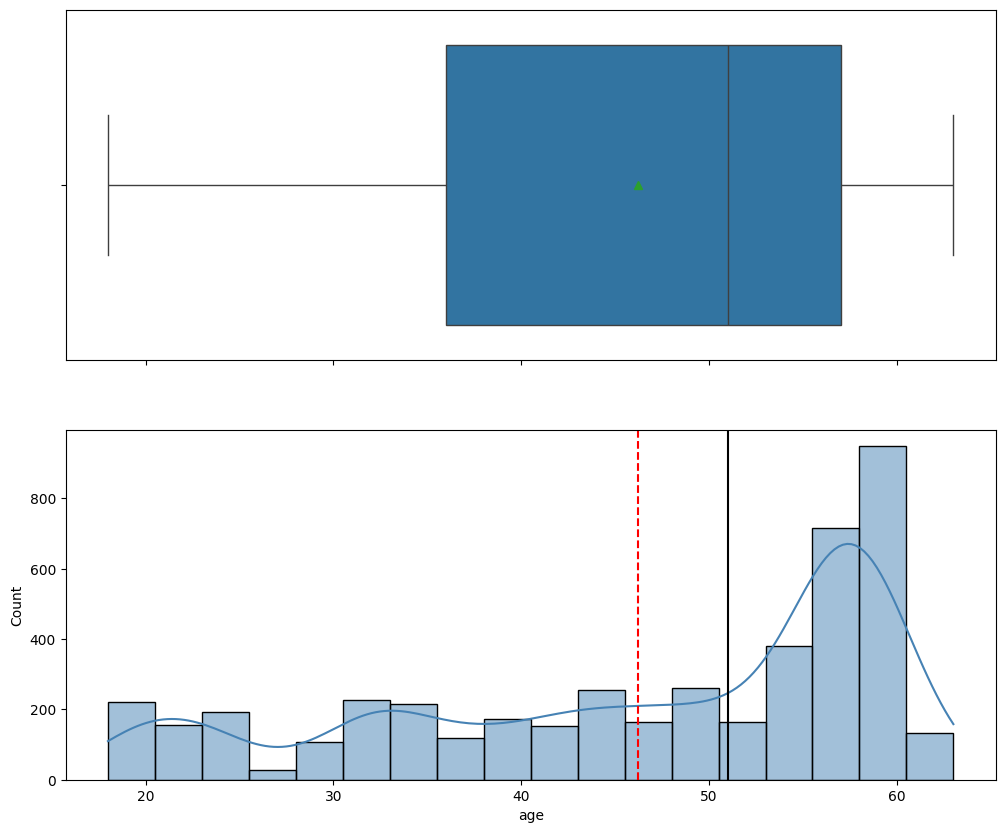

In [ ]:
histogram_boxplot(df, "age")

The age distribution is left-skewed, with most users falling in the 50–60 age range. The average age is around 46 years, indicating that the dataset is dominated by middle-aged to older users rather than younger ones.

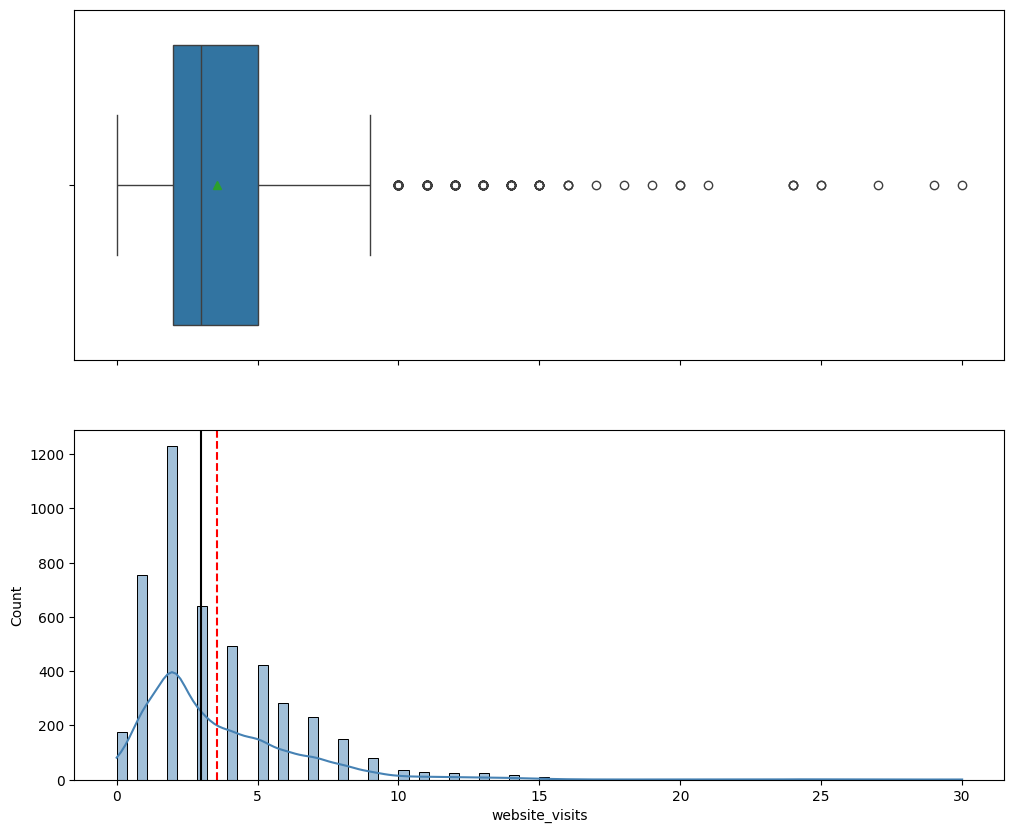

In [ ]:
histogram_boxplot(df, "website_visits")

The distribution of website visits is strongly right-skewed, with most users visiting the website between 1 and 5 times, and the median number of visits around 3. Overall, most leads visit only a few times before dropping off, which may indicate limited repeat engagement. A small number of users show very high visit activity (outliers). These users may represent highly engaged leads who are more likely to convert.

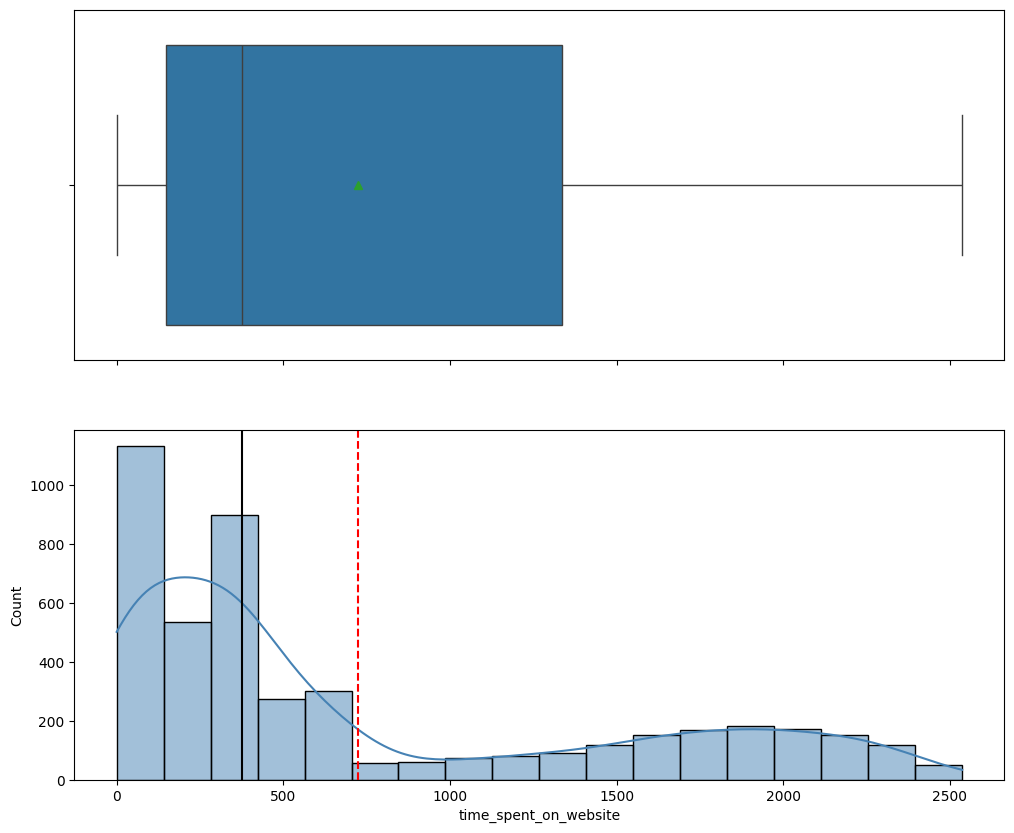

In [ ]:
histogram_boxplot(df, "time_spent_on_website")

Most users spend between 0 and 700 units of time on the website, while a smaller group spends significantly longer, up to around 2500 units. The majority of leads show short browsing activity, with only a few spending extended time on the platform. These users may represent highly interested leads, since longer time often signals stronger intent or deeper engagement.

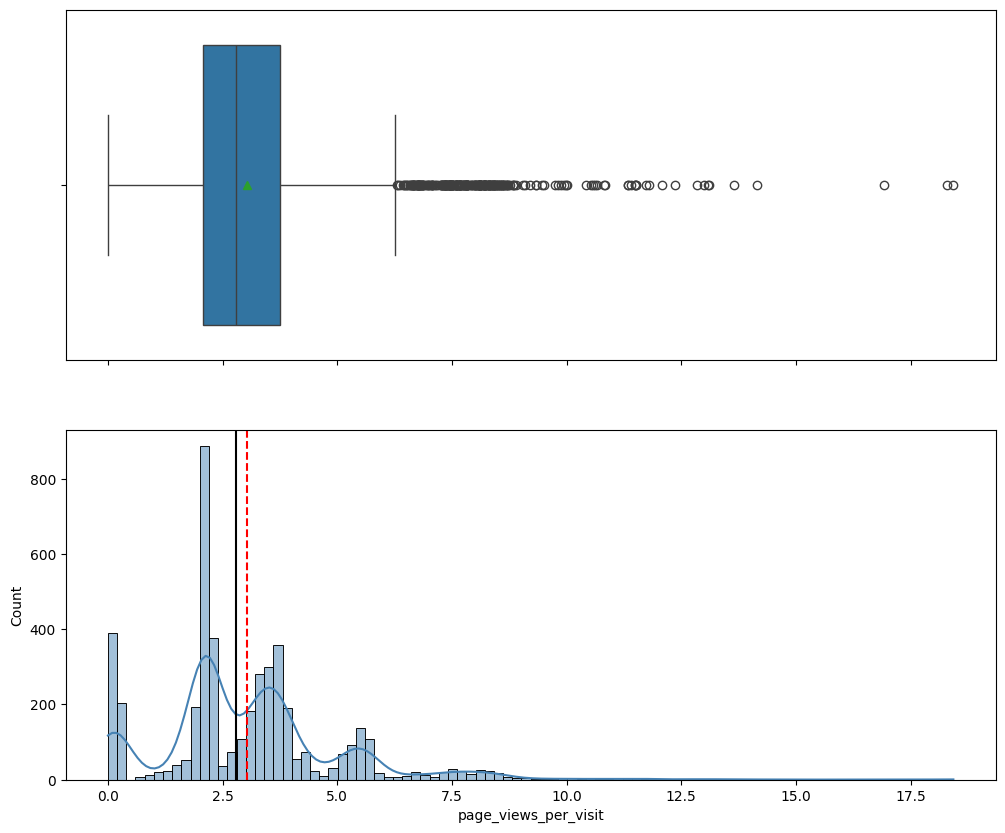

In [ ]:
histogram_boxplot(df, "page_views_per_visit")

The distribution of page_views_per_visit is strongly right-skewed, with most users viewing between 1 and 4 pages per visit. The average number of page views is around 2.7. The boxplot shows many outliers. These are the users who view more than 7-8 pages, but these cases are rare.

Since the categorical features are not yet encoded into numeric format, we will focus the correlation heatmap on the numeric columns only, to understand how these variables relate to one another.

In [ ]:
df[num_cols].corr()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
age,1.000000,-0.011975,0.018885,-0.040675,0.122084
website_visits,-0.011975,1.000000,0.062300,0.074094,-0.006609
time_spent_on_website,0.018885,0.062300,1.000000,0.068130,0.302100
page_views_per_visit,-0.040675,0.074094,0.068130,1.000000,0.000307
status,0.122084,-0.006609,0.302100,0.000307,1.000000


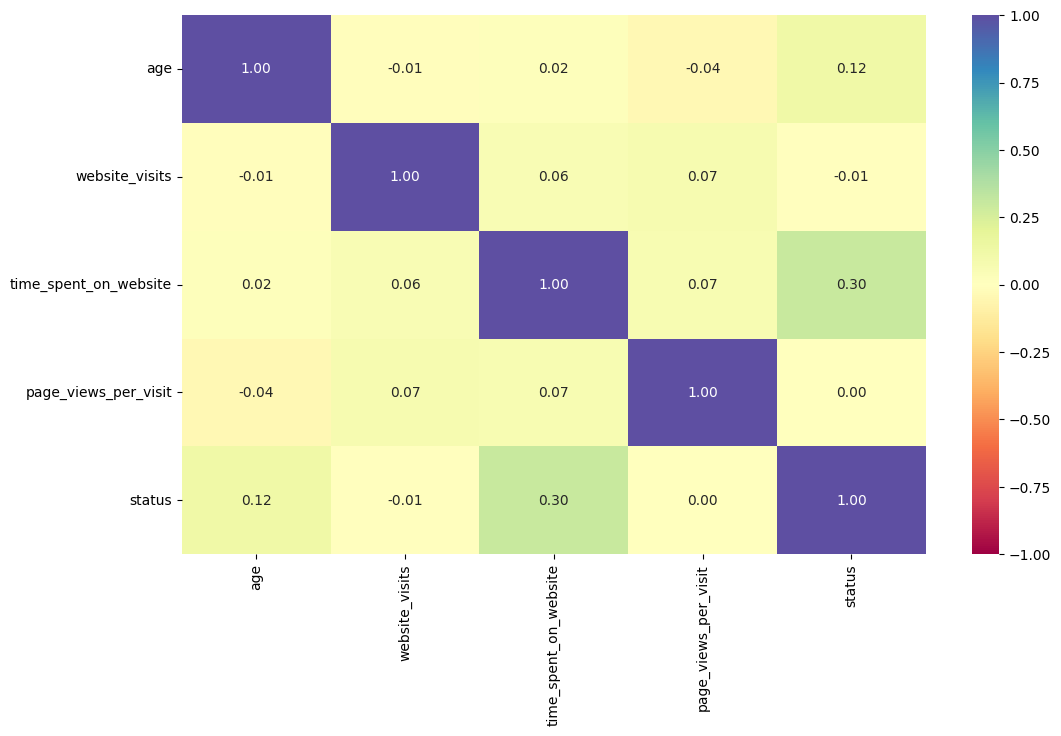

In [ ]:
# creating a correlation map for numerical columns
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12,7))
sns.heatmap(data=df[cols_list].corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral", fmt=".2f")
plt.show()

The correlation matrix shows that “time_spent_on_website” has the strongest positive correlation with lead conversion ("status"), meaning that the longer a user spends browsing the website, the higher their likelihood of becoming a paid customer.

**Univariate Analysis of categorical columns**

In [ ]:
# creating a function for all categorical columns
def labeled_countplot(data, feature, perc=False, palette="Set2",
                      figsize=(12,7), rotation=90):
  total = len(data[feature])
  order = data[feature].value_counts().index

  plt.figure(figsize=figsize)

  ax = sns.countplot(data=data, x=feature, order=order, palette=palette)
  plt.xticks(rotation=rotation)

  for p in ax.patches:
    if perc == True:
      label = "{:.1f}%".format(100 * p.get_height() / total)
    else:
      label = p.get_height()

    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    ax.annotate(label, (x, y), ha="center", va="bottom", xytext=(0, 5),
                textcoords="offset points")

  plt.tight_layout()
  plt.show()


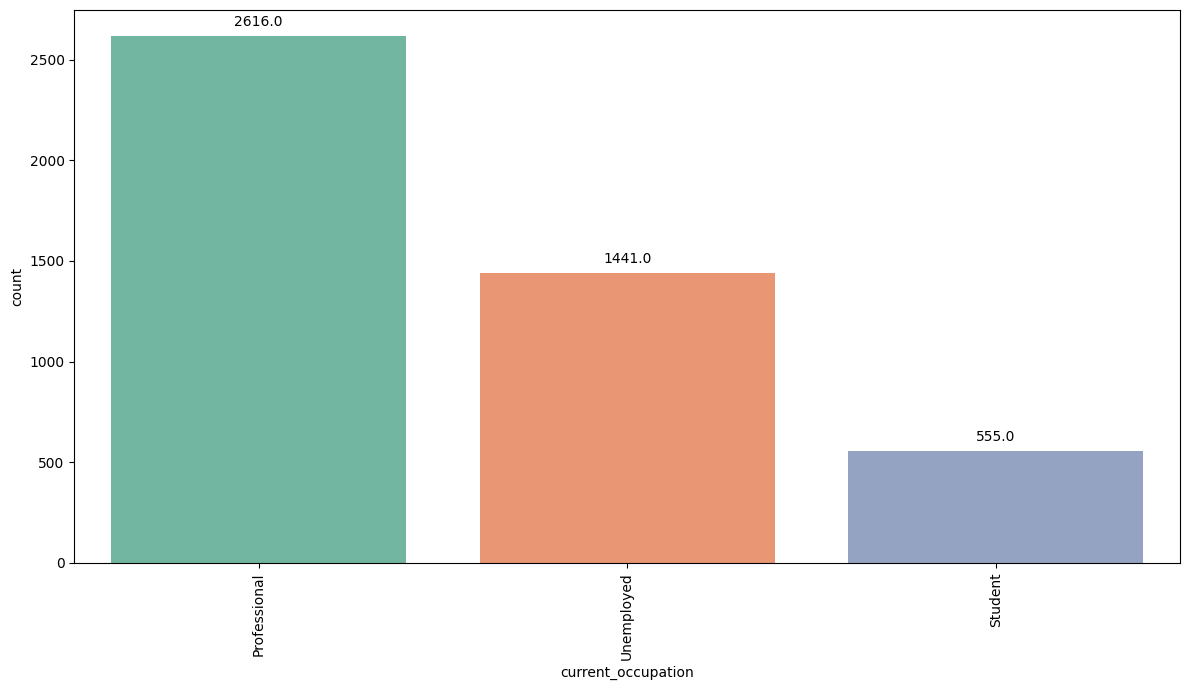

In [ ]:
labeled_countplot(df, "current_occupation")

From the plot, we can observe that the majority of leads are working professionals (2616), followed by unemployed users (1441), while students make up the smallest group (555). This indicates that the platform attracts far more professionals than students in terms of sign-ups.

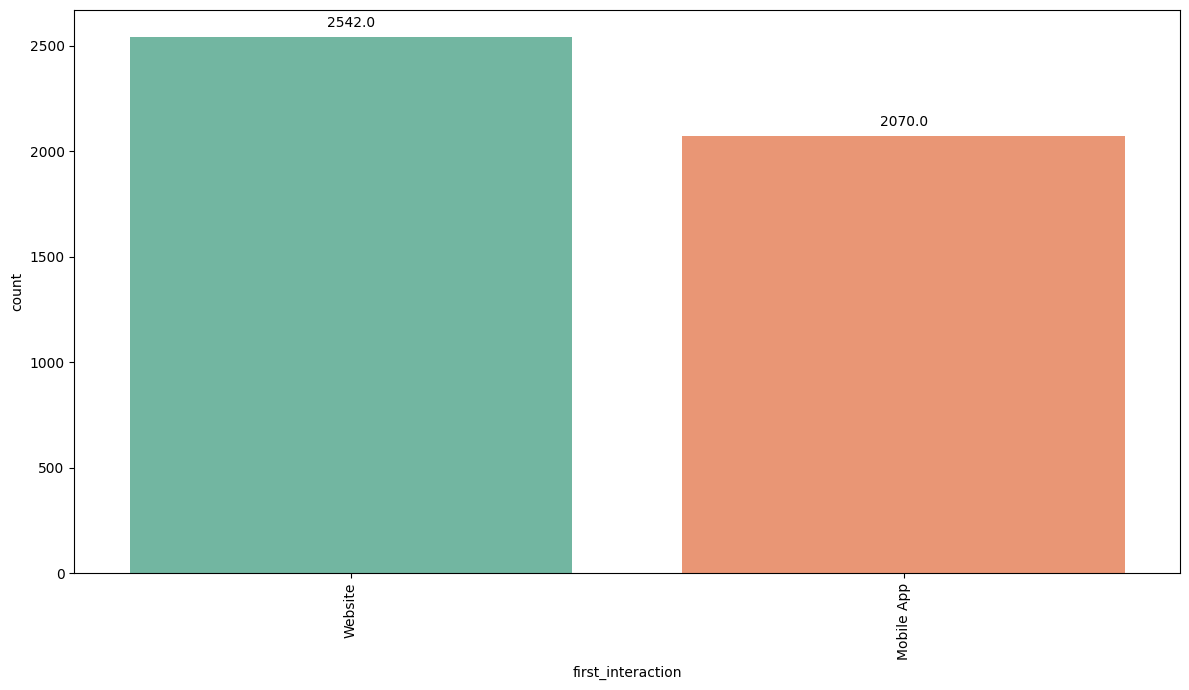

In [ ]:
labeled_countplot(df, "first_interaction")

The chart shows that slightly more users had their first interaction through the website (2542) compared to the mobile app (2070). This indicates that both platforms are actively used and important for attracting new leads.

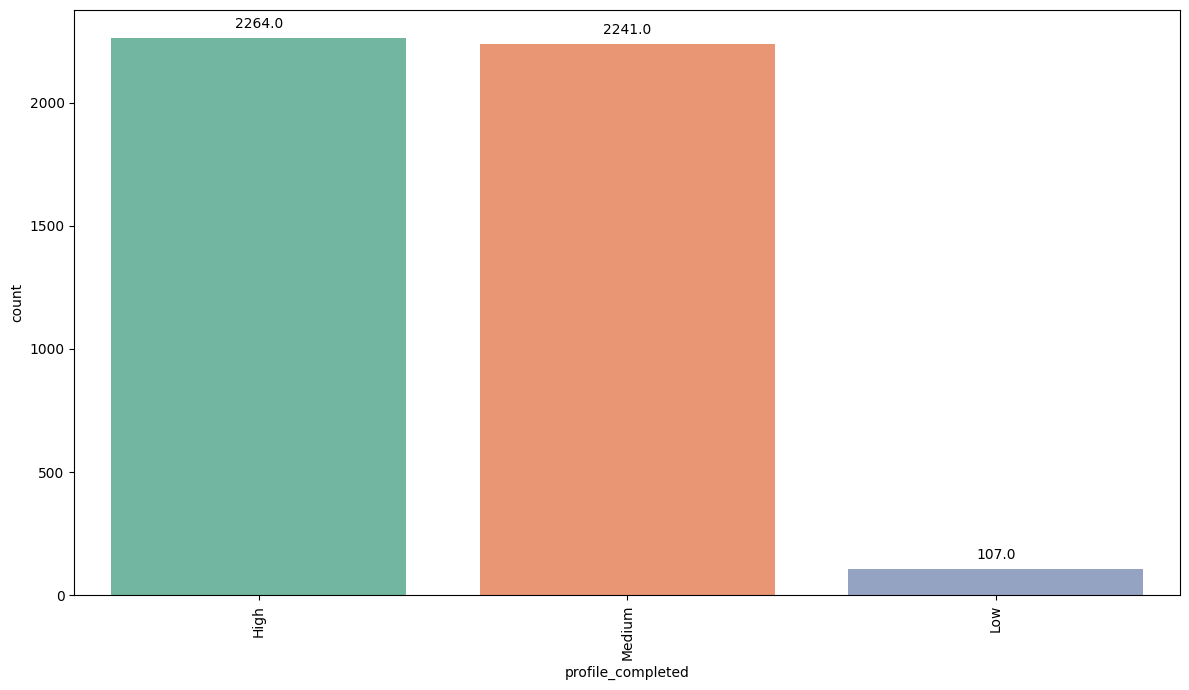

In [ ]:
labeled_countplot(df, "profile_completed")

The chart shows that nearly all users complete their profiles to at least a medium  or high level, while only a very small group (107 users) leave their profiles at a low completion level. This suggests that most leads engage enough with the platform to provide their personal information.

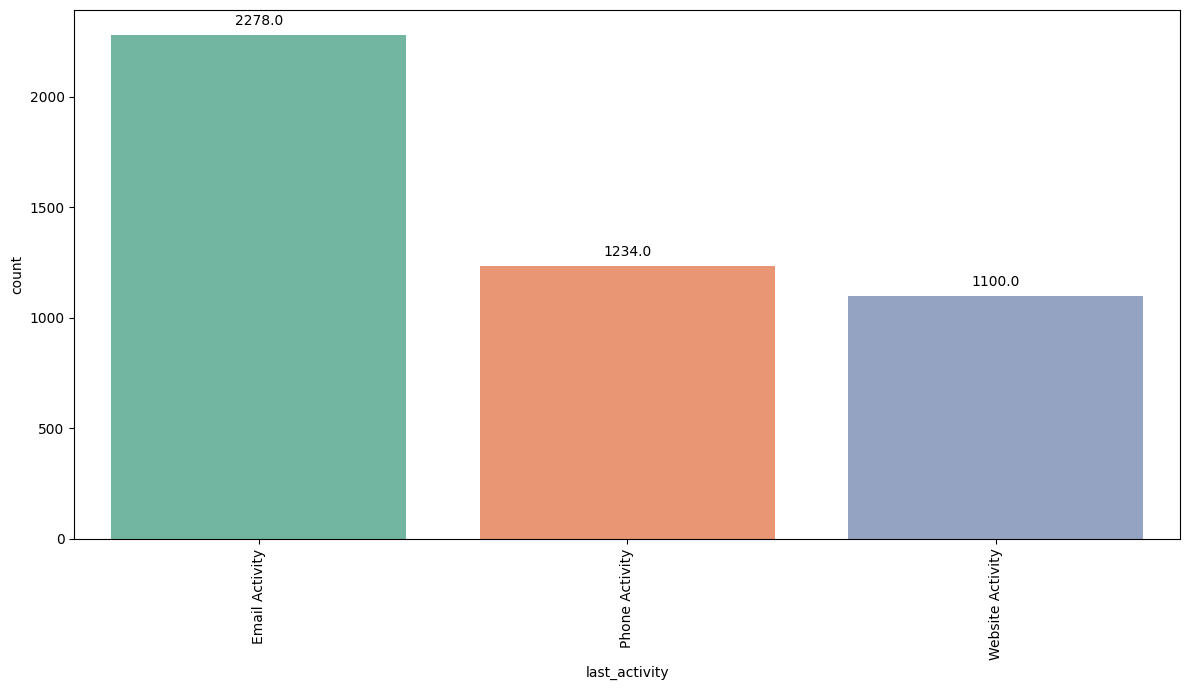

In [ ]:
labeled_countplot(df, "last_activity")

The chart shows that most users last interaction happened through email(2278 users), making it the most common communication channel. Phone(1234 users) is the second most frequent, while Website(1100 users) is the least used. This suggests that email is the primary source through which users engage with the platform.

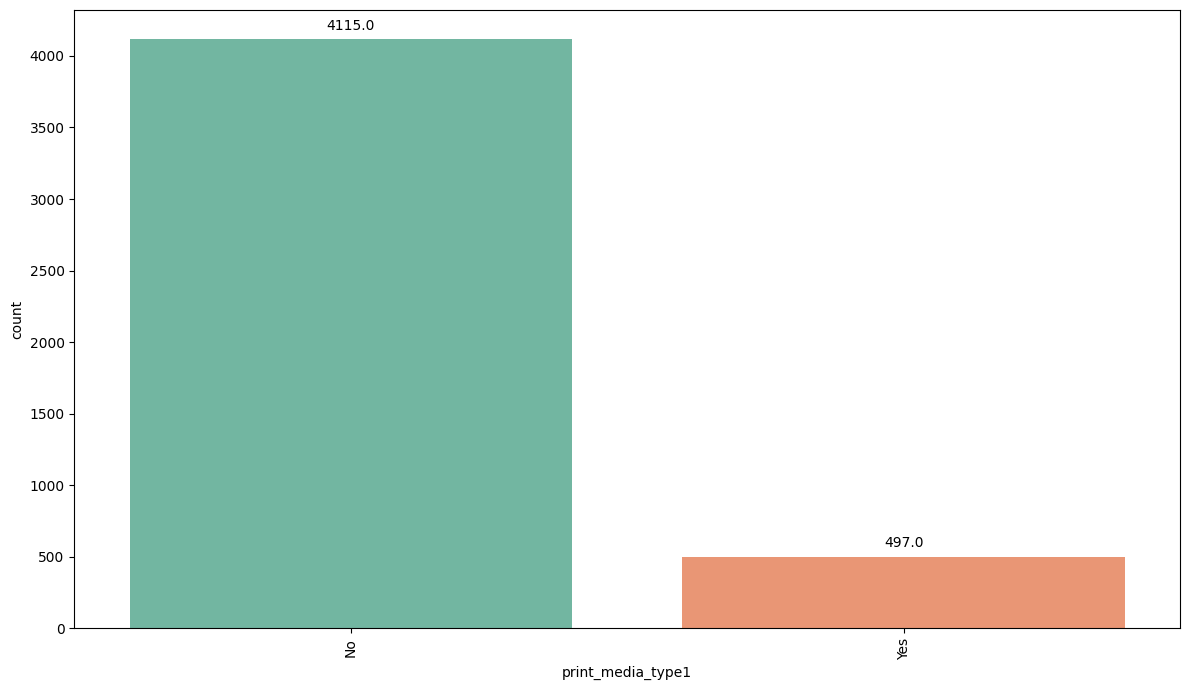

In [ ]:
labeled_countplot(df, "print_media_type1")

Most leads did not see the ExtraaLearn advertisement in the newspaper, with only a small portion reporting "yes" to it.

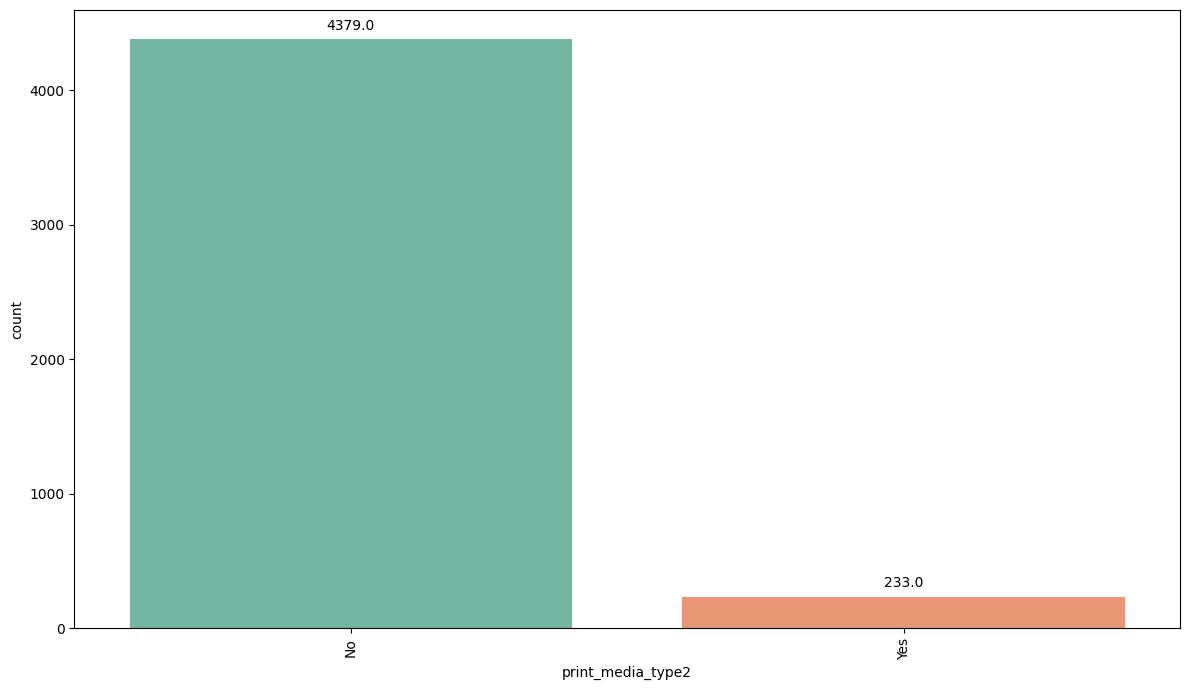

In [ ]:
labeled_countplot(df, "print_media_type2")

The chart shows that very few leads learned about ExtraaLearn through magazine ads, confirming that this print channel is not a major source of information.

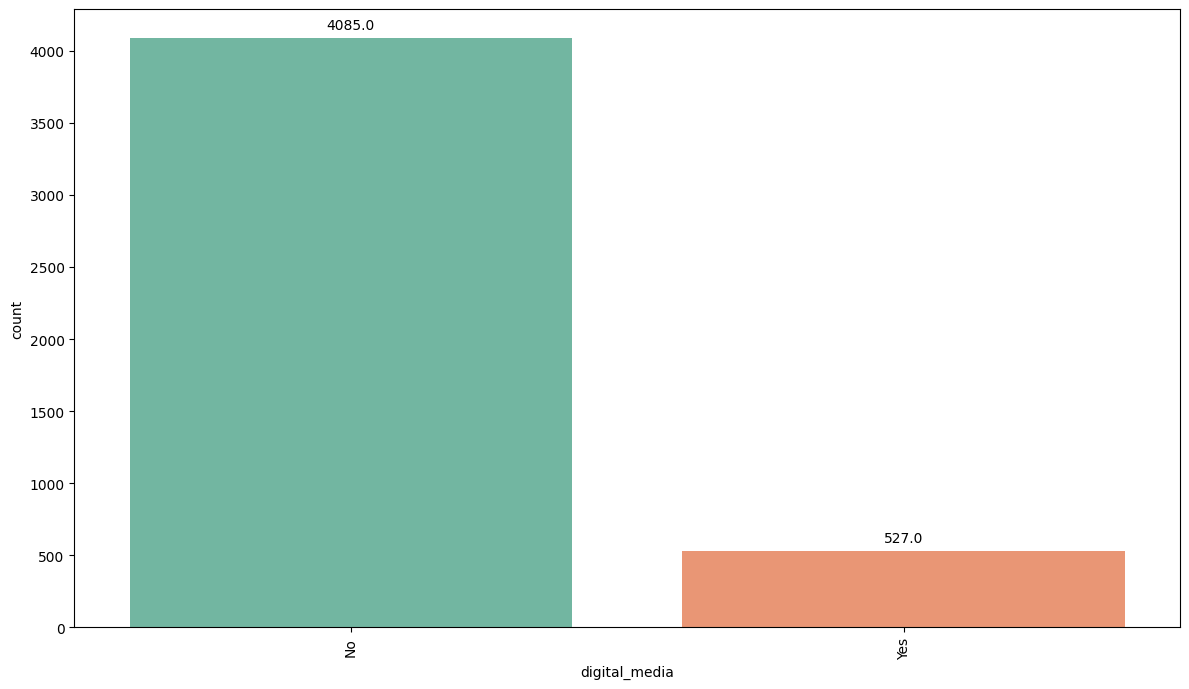

In [ ]:
labeled_countplot(df, "digital_media")

The chart shows that only a small number of leads came through digital media, indicating it is not a major source of recruiting either.

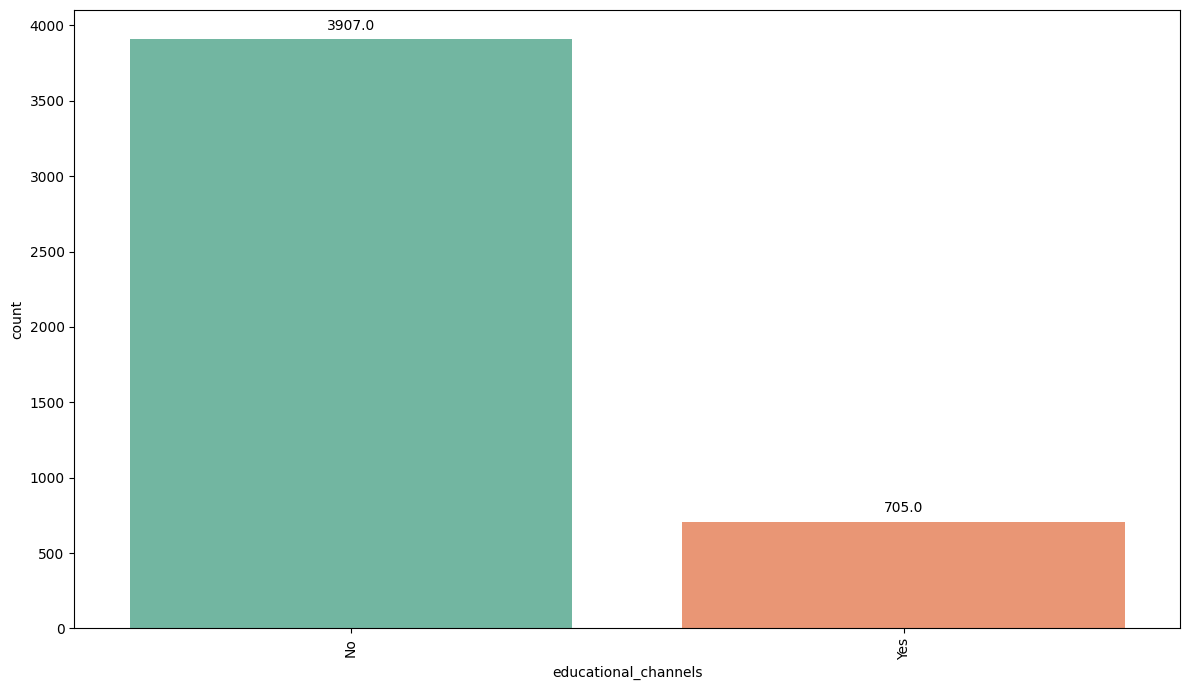

In [ ]:
labeled_countplot(df, "educational_channels")

Educational channels brought in more leads than print or digital media, but they still represent a relatively small share compared to those who did not discover the platform through these channels.

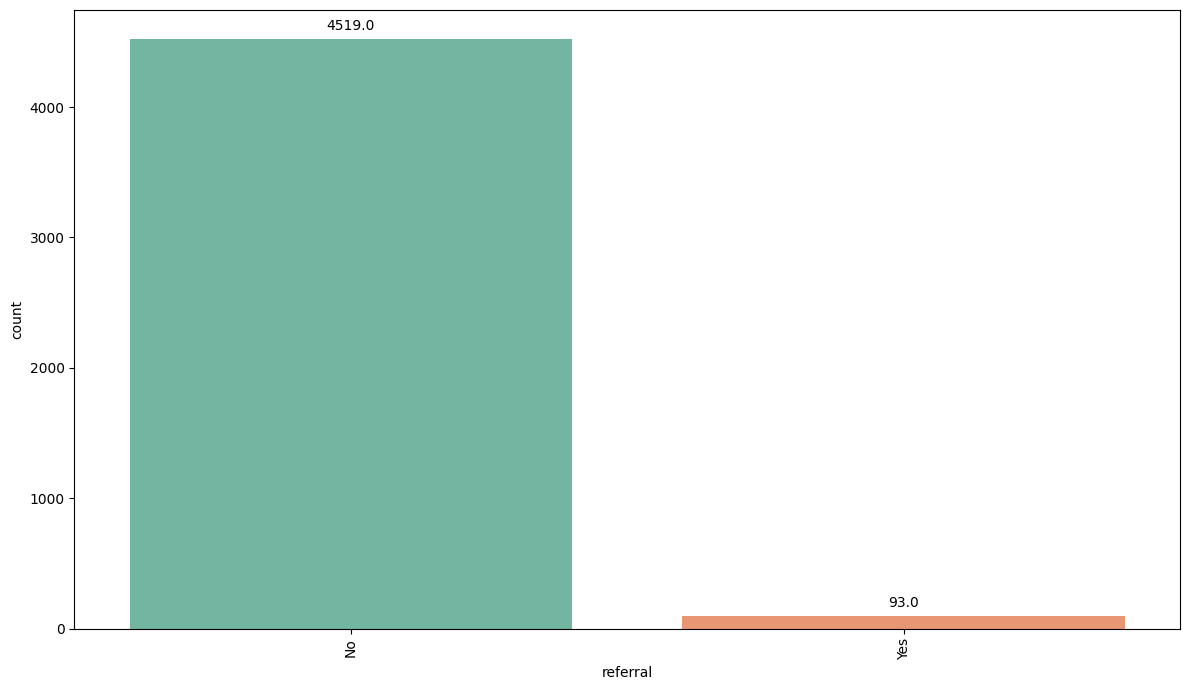

In [ ]:
labeled_countplot(df, "referral")

Only a very small number of leads came through referrals, indicating that it is not a significant channel for the platform.

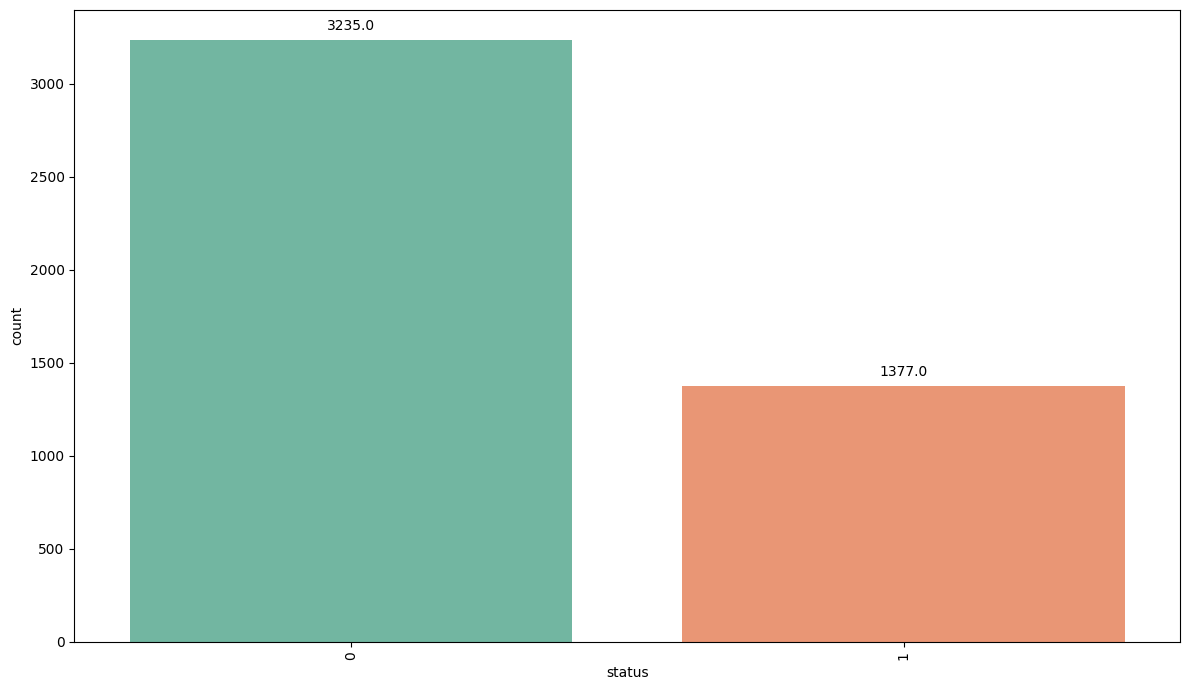

In [ ]:
labeled_countplot(df, "status")

In [ ]:
df['status'].value_counts()

,count
status,
0,3235
1,1377


Most users did not convert to paid customers, but a notable number (1377) still successfully completed the conversion.

**Bivariate Analysis**

In [ ]:
# creating a bar plot and count plot function for the data analysis
def stacked_barplot(data, predictor, target):
  count = data[predictor].nunique()
  sorter = 1
  table_1 = pd.crosstab(data[predictor], data[target],
                        margins=False).sort_values(by=sorter, ascending=False)

  print(table_1)
  print("--"*25)

  table_2 = pd.crosstab(data[predictor], data[target], normalize="index",
                        margins=False).sort_values(by=sorter, ascending=False)
  table_2.plot(kind="bar", stacked=True, figsize=(12,8), colormap="viridis")

  plt.tight_layout()
  plt.show()

Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.

status                 0    1
current_occupation           
Professional        1687  929
Unemployed          1058  383
Student              490   65
--------------------------------------------------


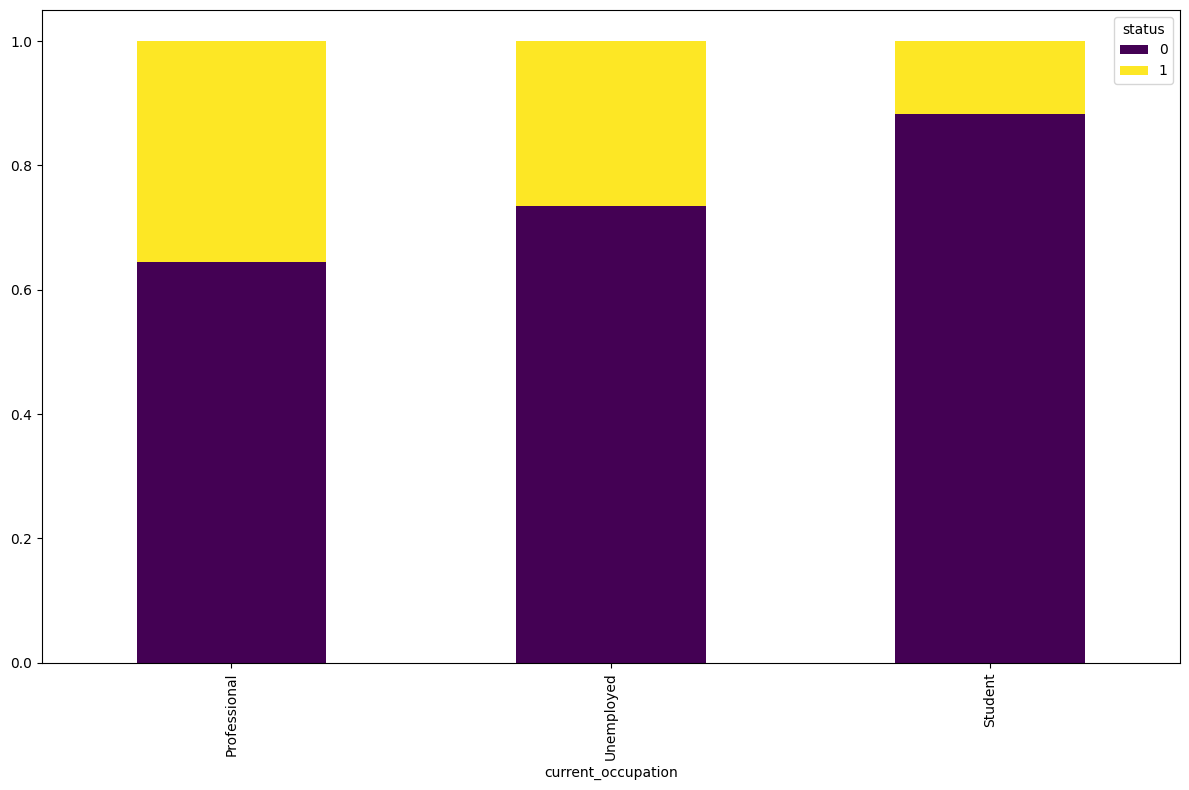

In [ ]:
stacked_barplot(df, "current_occupation", "status")

In [ ]:
status_vs_occup = df.groupby("current_occupation")["status"].mean()

As we could see, the data shows that professionals have the highest conversion rate (35.5%), followed by unemployed leads (26.6%), while students convert the least (11.7%).
This indicates that professionals and unemployed individuals are much more likely to become paid users, whereas students show significantly lower interest or ability to convert, making them the least responsive segment.

The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?

status                0     1
first_interaction            
Website            1383  1159
Mobile App         1852   218
--------------------------------------------------


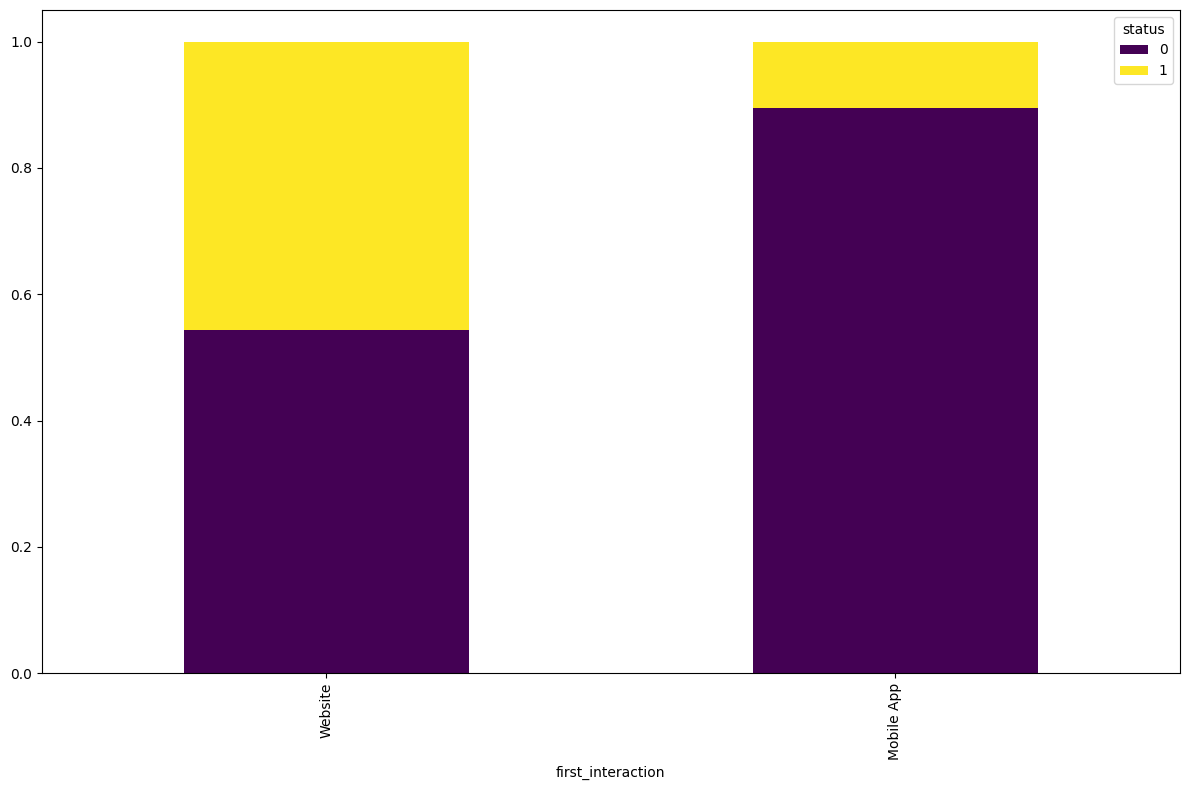

In [ ]:
stacked_barplot(df, "first_interaction", "status")

In [ ]:
df.groupby("first_interaction")["status"].mean()

,status
first_interaction,
Mobile App,0.105314
Website,0.455940


The first interaction channel clearly impacts whether a lead converts. Leads who first interact through the website convert almost four times more often (45.6%) than those who start on the mobile app (10.5%). This strongly suggests that the website experience is more effective in attracting users than the mobile app.

The company uses multiple modes to interact with prospects. Which way of interaction works best?

status               0    1
last_activity              
Email Activity    1587  691
Website Activity   677  423
Phone Activity     971  263
--------------------------------------------------


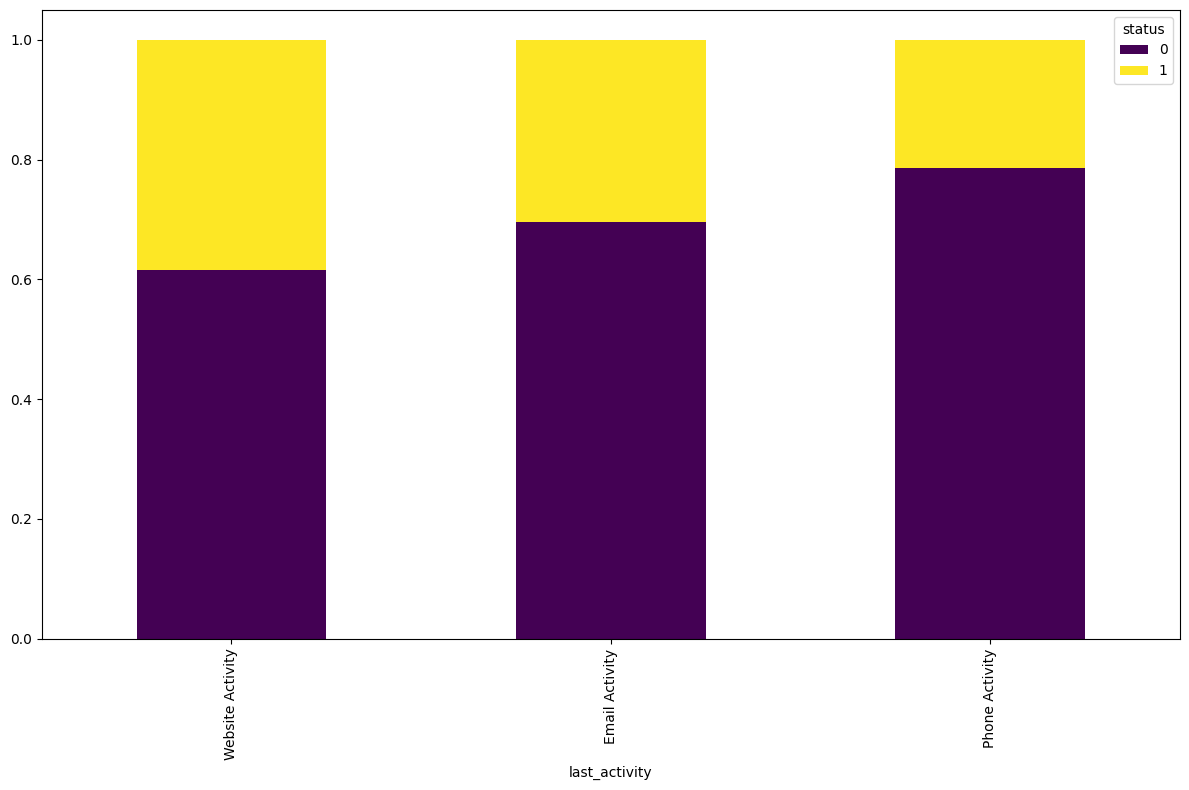

In [ ]:
stacked_barplot(df, "last_activity", "status")

In [ ]:
df.groupby("last_activity")["status"].mean()

,status
last_activity,
Email Activity,0.303336
Phone Activity,0.213128
Website Activity,0.384545


As we could see, website activity is the most effective interaction channel, with the highest proportion of leads converting (≈ about 38%). Email communication takes the second place (about 30%), while phone interactions show the lowest conversion rate (21%). This suggests that leads who engage with the website are the most likely to convert, making it the strongest channel for prospect interaction.

The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?

In [ ]:
channel_cols = ["print_media_type1", "print_media_type2", "digital_media", "educational_channels", "referral"]

In [ ]:
rates = []
for col in channel_cols:
  rate = df.loc[df[col] == "Yes", "status"].mean().round(4)
  rates.append(rate)

  print(f"{col}: {rate}")


print_media_type1: 0.3199
print_media_type2: 0.3219
digital_media: 0.3188
educational_channels: 0.2794
referral: 0.6774


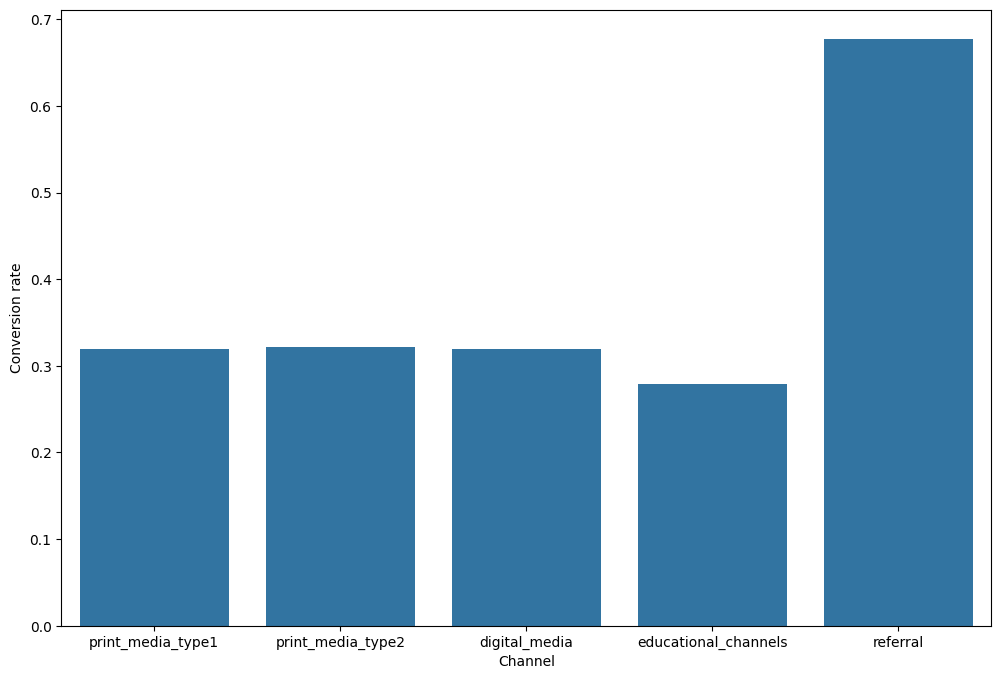

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=channel_cols, y=rates)
plt.xlabel("Channel")
plt.ylabel("Conversion rate")
plt.show()

Referrals have by far the highest conversion rate, while all other channels (print, digital, and educational) convert at very similar and significantly lower rates.

People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

status                0    1
profile_completed           
High               1318  946
Medium             1818  423
Low                  99    8
--------------------------------------------------


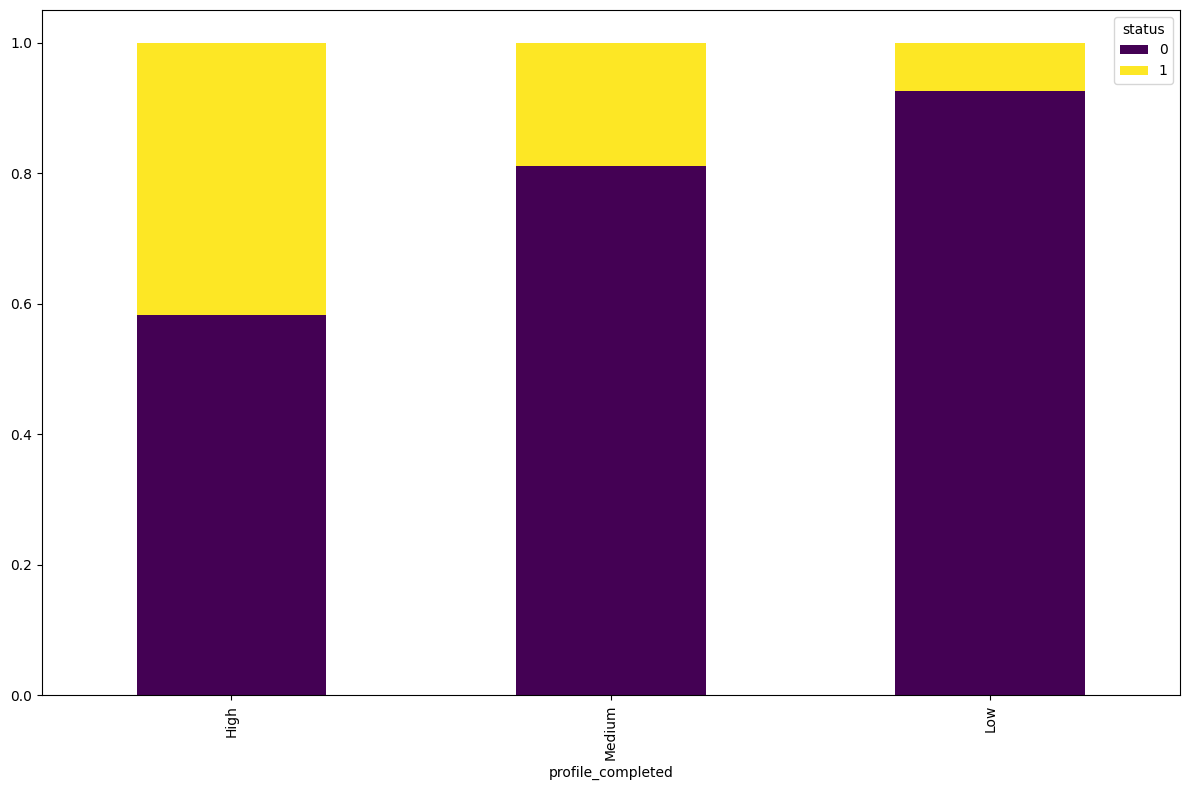

In [ ]:
stacked_barplot(df, "profile_completed", "status")

In [ ]:
df.groupby("profile_completed")["status"].mean()

,status
profile_completed,
High,0.417845
Low,0.074766
Medium,0.188755


The data clearly shows that leads with highly completed profiles convert at much higher rates. Having more detailed information about a prospect significantly increases the likelihood of conversion.

## Data Preprocessing

Before building the model, we need to prepare the data by identifying outliers, encoding the categorical columns, splitting the dataset into training and test sets, etc.

First, we will identify outliers, and see if some data is unnecesary for our analysis. Since we already created a list of numerical columns, we will loop through it and use IQR method to see their distribution for each numerical column

In [ ]:
# identifying outliers
for col in num_cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr

  low_outliers = (df[col] < lower_bound).sum()
  up_outliers = (df[col] > upper_bound).sum()

  print(f"{col} - lower outliers: {low_outliers}")
  print(f"{col} - upper_outliers: {up_outliers}")

age - lower outliers: 0
age - upper_outliers: 0
website_visits - lower outliers: 0
website_visits - upper_outliers: 154
time_spent_on_website - lower outliers: 0
time_spent_on_website - upper_outliers: 0
page_views_per_visit - lower outliers: 0
page_views_per_visit - upper_outliers: 257
status - lower outliers: 0
status - upper_outliers: 0


The "website_visits" and "page_views_per_visit" columns contain several high-value outliers, however, these reflect the leads usual behavior rather than data errors. Therefore, we keep these outliers in the dataset.

In [ ]:
# encoding categorical variables
pd.get_dummies(df, columns=cat_cols, drop_first=True)


,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,1,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.320,0,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3,330,0.074,0,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4,464,2.057,1,False,True,True,False,False,False,True,False,False,False,False,False
4,23,4,600,16.914,0,True,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,15,360,2.170,0,False,True,False,False,True,True,False,False,False,False,True,False
4608,55,8,2327,5.393,0,False,False,False,False,True,False,False,False,False,False,False,False
4609,58,2,212,2.692,1,False,False,True,False,False,False,False,False,False,False,False,False
4610,57,1,154,3.879,0,False,False,False,False,True,False,True,True,False,False,False,False


In [ ]:
# creating new data frame with encoded variables
dummies_df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print(dummies_df.head())

   age  website_visits  time_spent_on_website  page_views_per_visit  status  \
0   57               7                   1639                 1.861       1   
1   56               2                     83                 0.320       0   
2   52               3                    330                 0.074       0   
3   53               4                    464                 2.057       1   
4   23               4                    600                16.914       0   

   current_occupation_Student  current_occupation_Unemployed  \
0                       False                           True   
1                       False                          False   
2                       False                          False   
3                       False                           True   
4                        True                          False   

   first_interaction_Website  profile_completed_Low  profile_completed_Medium  \
0                       True                  False        

In [ ]:
# splitting the data into target and predictor variables
X = dummies_df.drop("status", axis=1)
y = dummies_df["status"]

In [ ]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(3689, 16)
(923, 16)


After splitting the data, we can see that 80% of the rows (3689) were allocated to the training set and 20% (923) to the test set, which is an appropriate and commonly used split.

In [ ]:
# creating a metrics_score(actual and predicted)
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (12,7))

    sns.heatmap(cm, annot = True, fmt = '.2f',
                xticklabels=['Not Converted', 'Converted'],
                yticklabels=['Not Converted', 'Converted'], cmap="coolwarm")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()

    plt.show()

The confusion matrix helps us understand how well the model predicted the two classes (Converted vs. Not Converted).
It breaks predictions into four categories:

True Positive (TP) - actual converted, predicted converted

True Negative (TN) - actual not converted, predicted not converted

False Positive (FP) - actual not converted, predicted converted

False Negative (FN) - actual converted, predicted not converted

This matrix helps us see where the model is making mistakes.

In [ ]:
# creating a classification model
def classification_model(model, predictors, target):
  pred = model.predict(predictors)

  recall = recall_score(target, pred)
  precision = precision_score(target, pred)
  accuracy = accuracy_score(target, pred)
  f1 = f1_score(target, pred)
  roc_auc = roc_auc_score(target, pred)

  df_metrics = pd.DataFrame({"Precision": [precision],
                             "Recall": [recall],
                             "Accuracy": [accuracy],
                             "F1 Score": [f1],
                             "Roc AUC": [roc_auc]},
                            index = [0])
  return df_metrics

We also built a function that calculates important performance metrics:

Precision - out of all leads the model predicted as converted, how many actually converted

Recall - out of all leads that actually converted, how many the model correctly identified

Accuracy - overall percentage of correct predictions

F1 Score - a balanced measure combining Precision and Recall

ROC AUC - shows how well the model separates converted vs. not converted leads (values closer to 1 are better)

## Building a Decision Tree model

In [ ]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# performing the prediciton on the Train data
y_train_pred_d_tree = d_tree.predict(X_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



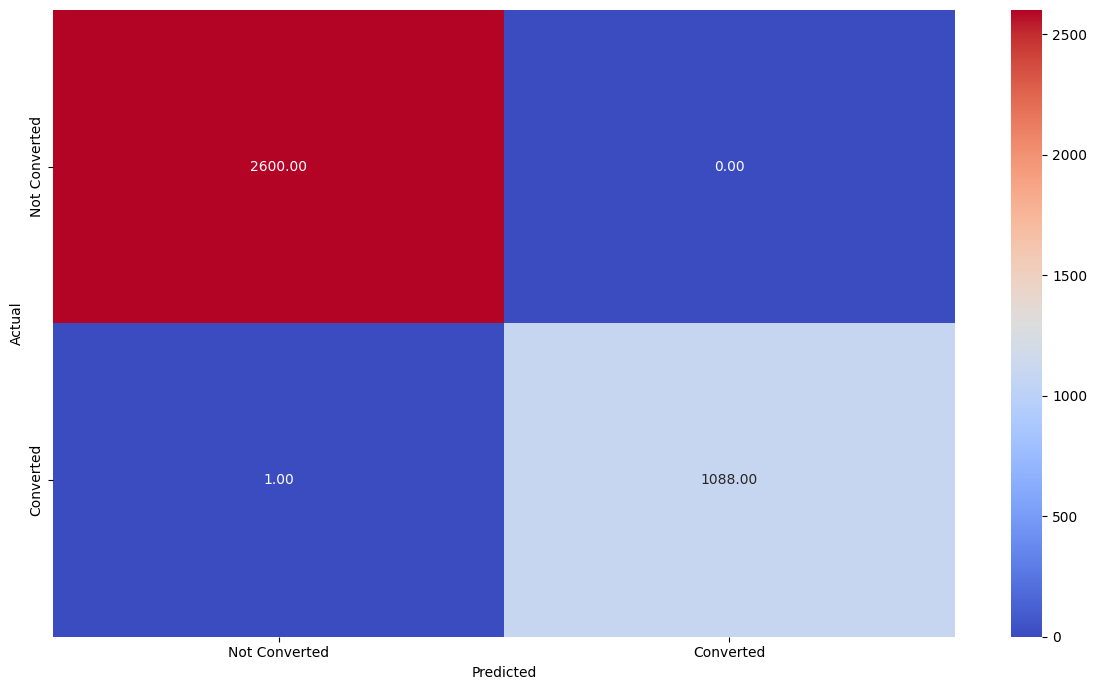

In [ ]:
# checking the model performance on the Train data
classification_model(d_tree, X_train, y_train)
metrics_score(y_train, y_train_pred_d_tree)

We can see that the decision tree completely memorized the training data, resulting in a 100% training score

In [ ]:
# performing the prediciton on the Test data
y_test_pred_d_tree = d_tree.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       635
           1       0.71      0.70      0.71       288

    accuracy                           0.82       923
   macro avg       0.79      0.79      0.79       923
weighted avg       0.82      0.82      0.82       923



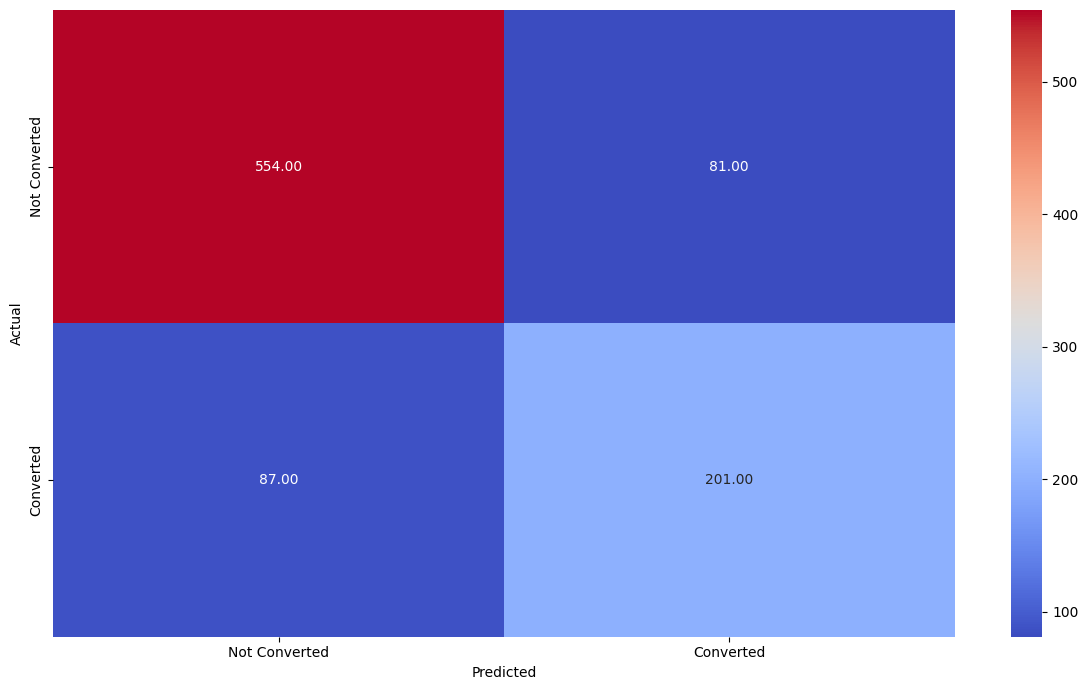

In [ ]:
# checking the model performance on the Test data
classification_model(d_tree, X_test, y_test)
metrics_score(y_test, y_test_pred_d_tree)

On the test dataset, performance decreased to 82% accuracy and 71% F1 score for the “Converted” class. This drop is expected and shows how the model performs on unseen data. The Decision Tree is overfitting the training data.

## Model Performance evaluation and improvement

To improve the model, we will use GridSearchCV for hyperparameter tuning.
We will test different values of:
criterion = "entropy" and "gini" to measure information gain at each split, "max_depth" to limit how deep the tree can grow and reduce overfitting, "min_samples_leaf" to ensure each leaf has enough samples and make the model more stable, and "class_weight" to balance the data.
These parameters help control model complexity and improve its generalization on unseen data.

In [ ]:
d_tree_estimator = DecisionTreeClassifier(random_state=1,
                        class_weight={0: 0.17, 1: 0.83})

parameters = {"criterion": ["gini", "entropy"],
              "max_depth": np.arange(2,12),
              "min_samples_leaf": [3, 5, 10, 20]}

scorer = make_scorer(recall_score, pos_label=1)

grid_search = GridSearchCV(estimator=d_tree_estimator,  param_grid=parameters,
                           scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

d_tree_estimator = grid_search.best_estimator_
d_tree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=np.int64(2),
                       min_samples_leaf=3, random_state=1)

              precision    recall  f1-score   support

           0       0.99      0.36      0.52      2600
           1       0.39      1.00      0.56      1089

    accuracy                           0.54      3689
   macro avg       0.69      0.68      0.54      3689
weighted avg       0.82      0.54      0.54      3689



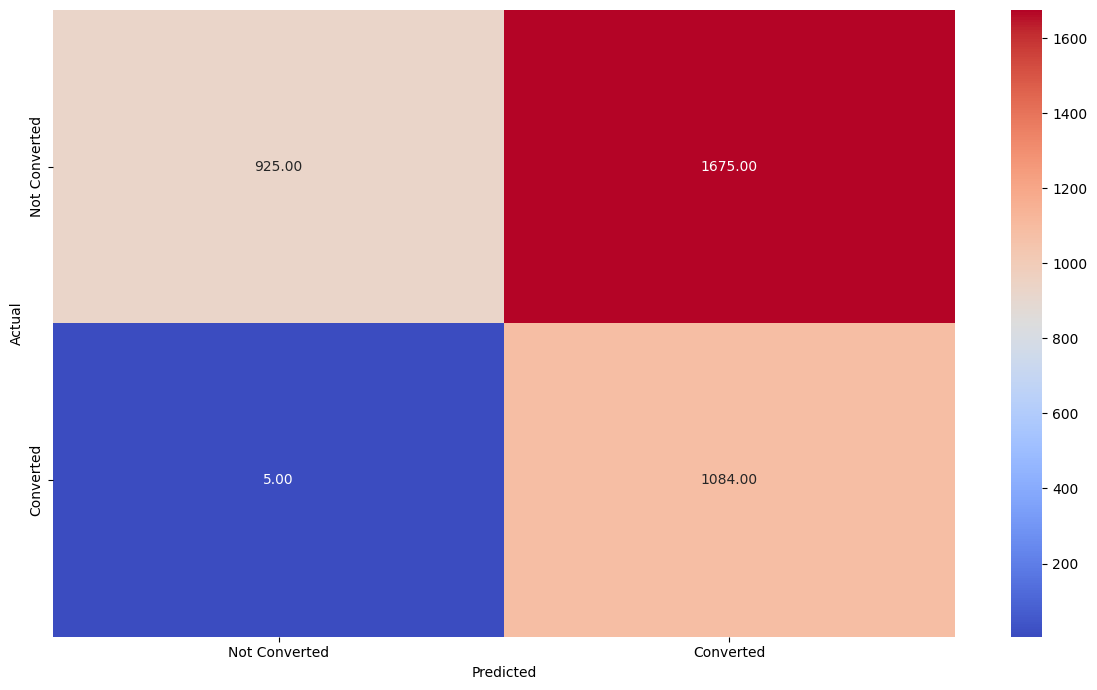

In [ ]:
y_train_pred_d_tree_gs = d_tree_estimator.predict(X_train)
classification_model(d_tree_estimator, X_train, y_train)
metrics_score(y_train, y_train_pred_d_tree_gs)

As we can see from the tuned model, it almost never misses real converters.The recall for the “Converted” class is extremely high. However, the model incorrectly labels many not converted users as converters, which results in a large number of false positives. This happens because the model was optimized for recall but not precision. As a result, the F1-score drops significantly to around 56%, since F1 balances both: precision and recall.

              precision    recall  f1-score   support

           0       1.00      0.34      0.51       635
           1       0.41      1.00      0.58       288

    accuracy                           0.54       923
   macro avg       0.70      0.67      0.54       923
weighted avg       0.81      0.54      0.53       923



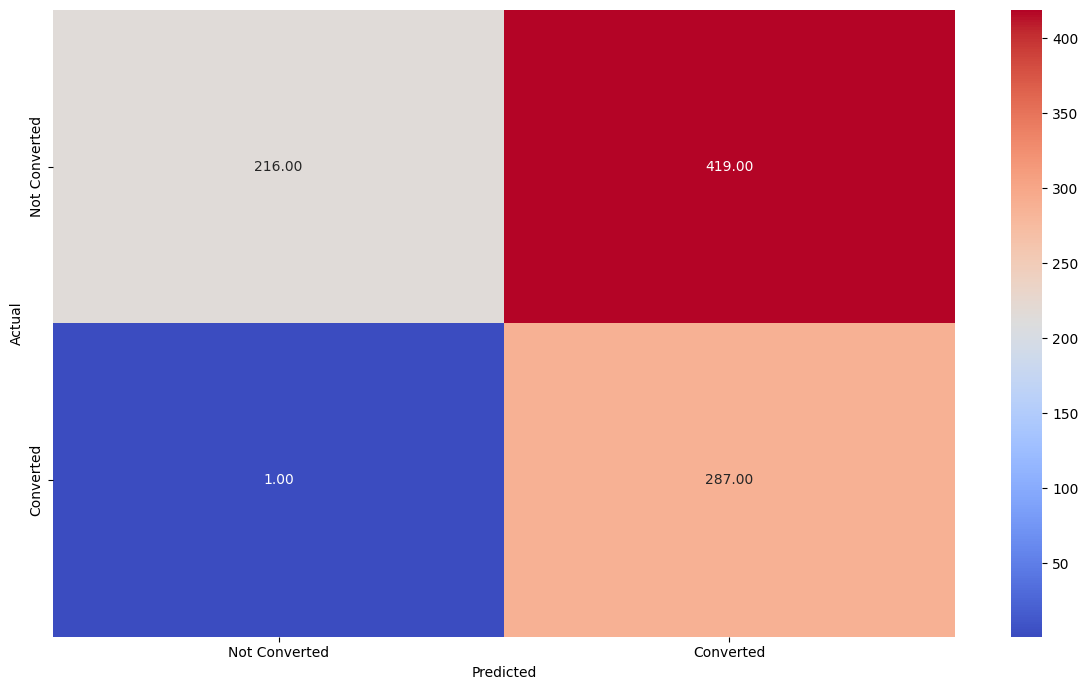

In [ ]:
y_test_pred_d_tree_gs = d_tree_estimator.predict(X_test)
classification_model(d_tree_estimator, X_test, y_test)
metrics_score(y_test, y_test_pred_d_tree_gs)

Now we can see that recall for the converted class is again extremely high, meaning the model continues to capture almost all actual converters. However, just like in the training results, the F1-score drops significantly because the model produces a large number of false positives. It predicts many users as converted even when they are not. Despite this, the predictions for truly converted leads remain 100% accurate.

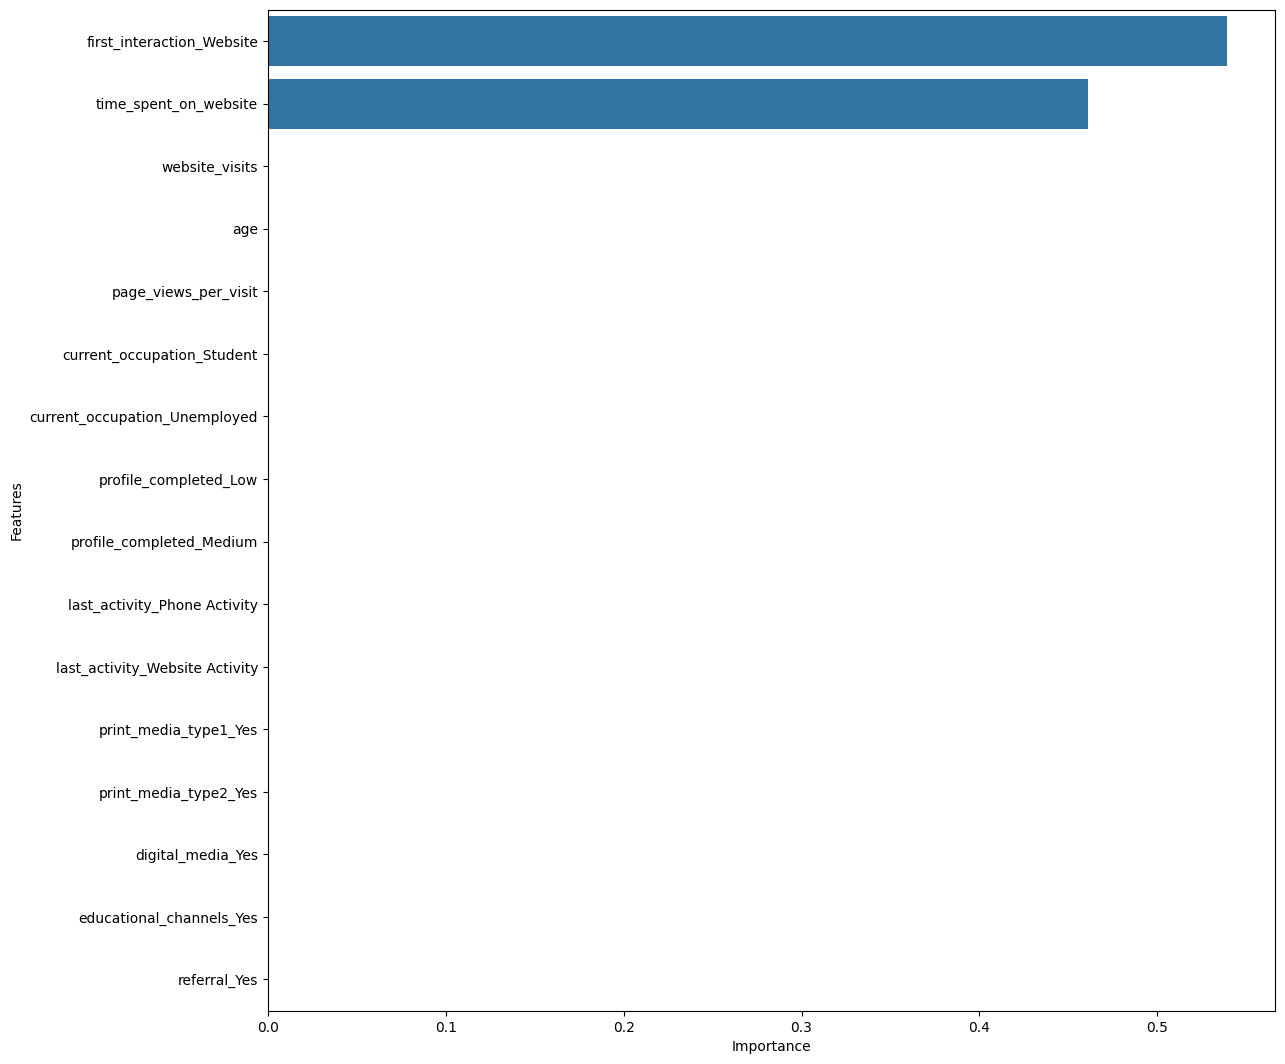

In [ ]:
# checking feature importances
importances = d_tree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance'])\
                     .sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(x=importance_df.Importance, y=importance_df.index)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

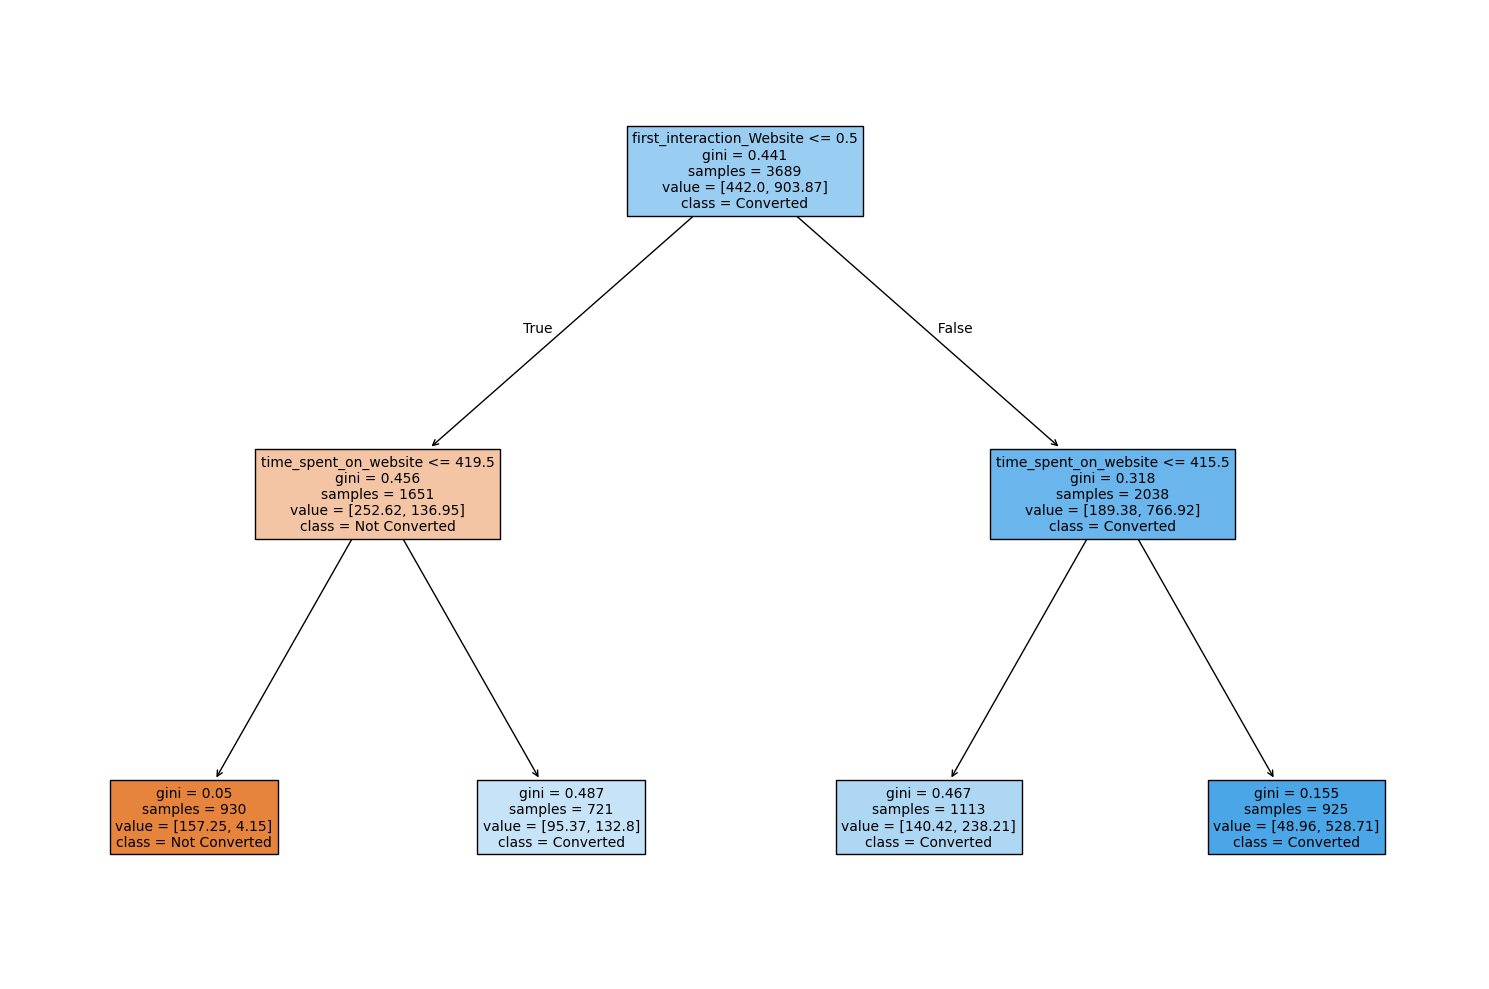

In [ ]:
# visualizing the decision tree
features = list(X.columns)
class_labels = ["Not Converted", "Converted"]

plt.figure(figsize=(15,10))
tree.plot_tree(d_tree_estimator, feature_names=features,class_names=class_labels,
               filled=True, fontsize=10)
plt.tight_layout()
plt.show()

The feature importance plot shows that user engagement behavior,especially whether the first interaction happened on the website and the amount of time a user spends on the website, plays the biggest role in determining conversions. These two features outweigh all other variables in the dataset.

## Building a Random Forest model

We next build a random forest classifier. Since a single decision tree tends to overfit the training data, random forest reduces this issue by combining many trees into one ensemble model. By averaging the predictions of multiple trees, the random forest captures broader and more stable patterns in the data and is less sensitive to noise. As a result, it typically achieves more balanced and reliable performance metrics compared to a single tree.

In [ ]:
r_forest = RandomForestClassifier(random_state=1)
r_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_train_pred_r_forest = r_forest.predict(X_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



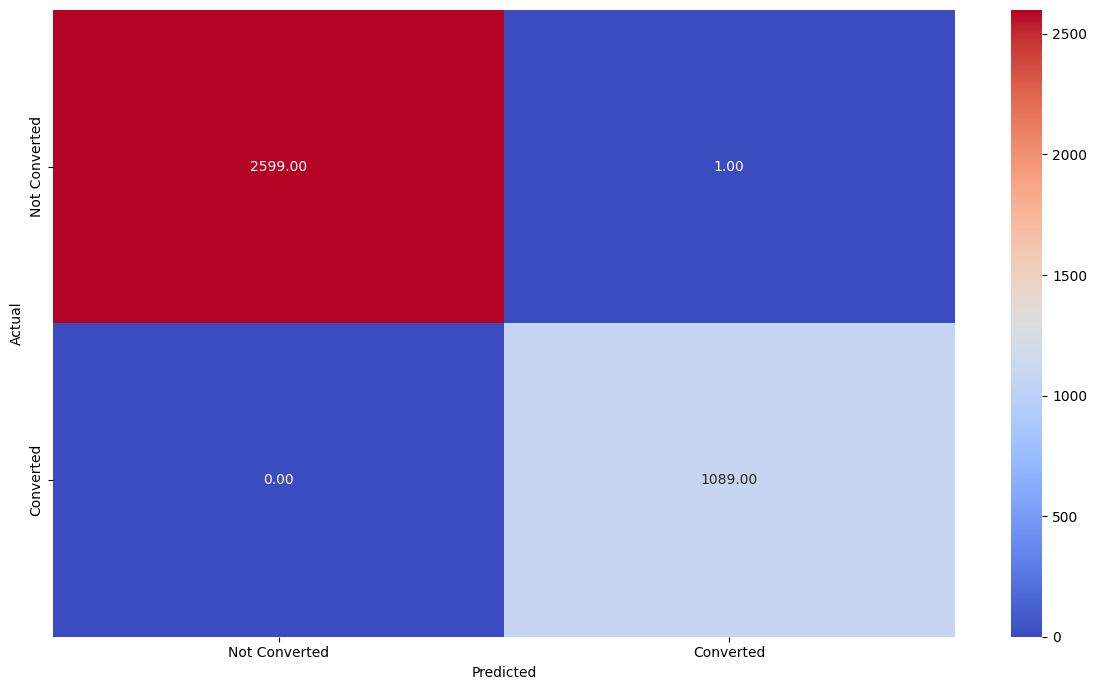

In [ ]:
classification_model(r_forest, X_train, y_train)
metrics_score(y_train, y_train_pred_r_forest)

The random forest model achieved perfect performance on the training dataset. The confusion matrix shows that the model correctly classified almost every observation in the training set (only 1 misclassification). To understand whether the model generalizes well, we now evaluate it on the test set to compare actual predictive performance on unseen data.

In [ ]:
y_test_pred_r_forest = r_forest.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       635
           1       0.83      0.74      0.78       288

    accuracy                           0.87       923
   macro avg       0.86      0.83      0.84       923
weighted avg       0.87      0.87      0.87       923



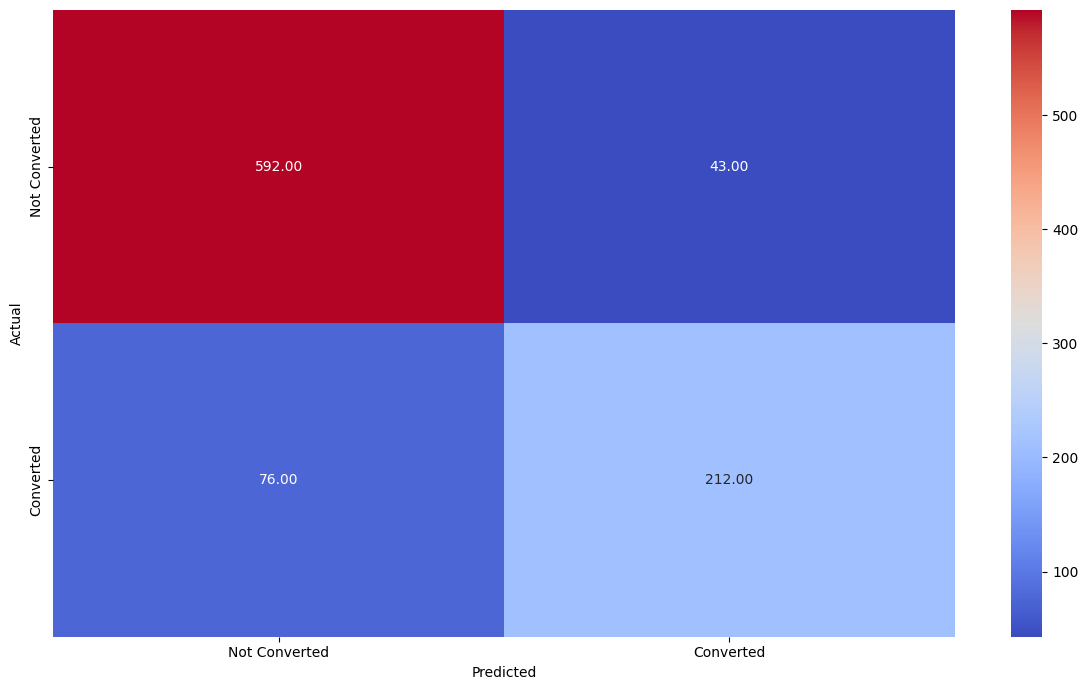

In [ ]:
classification_model(r_forest, X_test, y_test)
metrics_score(y_test, y_test_pred_r_forest)

Unlike a single decision tree, which easily overfits to training data, the random forest aggregates many trees trained on different subsets of the data. As we can see, the random forest model achieved an accuracy of 87%, which is a significant improvement compared to the single decision tree. The model performs well at identifying leads who did not convert, demonstrating strong precision and recall for the negative class.
However, the model is less accurate when identifying actual converters. The recall for the converted class is only 74%. To improve the model's ability to correctly identify these positive cases, we will proceed with hyperparameter tuning.

## Model Performance evaluation and improvement

In [ ]:
# Random Forest Classifier
r_forest_estimator = RandomForestClassifier(random_state=1,
                              class_weight="balanced")

parameters ={"criterion": ["gini", "entropy"],
              "max_depth": np.arange(2,12),
              "min_samples_leaf": [2, 5, 10],
              "n_estimators": [100, 200, 300]}

scorer = make_scorer(f1_score, pos_label=1)

grid_search = GridSearchCV(estimator=r_forest_estimator, param_grid=parameters,
                           scoring=scorer, cv=5 )
grid_search.fit(X_train, y_train)

r_forest_estimator = grid_search.best_estimator_
r_forest_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=np.int64(8),
                       min_samples_leaf=2, random_state=1)

In [ ]:
y_train_pred_r_forest_gs = r_forest_estimator.predict(X_train)

              precision    recall  f1-score   support

           0       0.95      0.86      0.91      2600
           1       0.73      0.89      0.81      1089

    accuracy                           0.87      3689
   macro avg       0.84      0.88      0.86      3689
weighted avg       0.89      0.87      0.88      3689



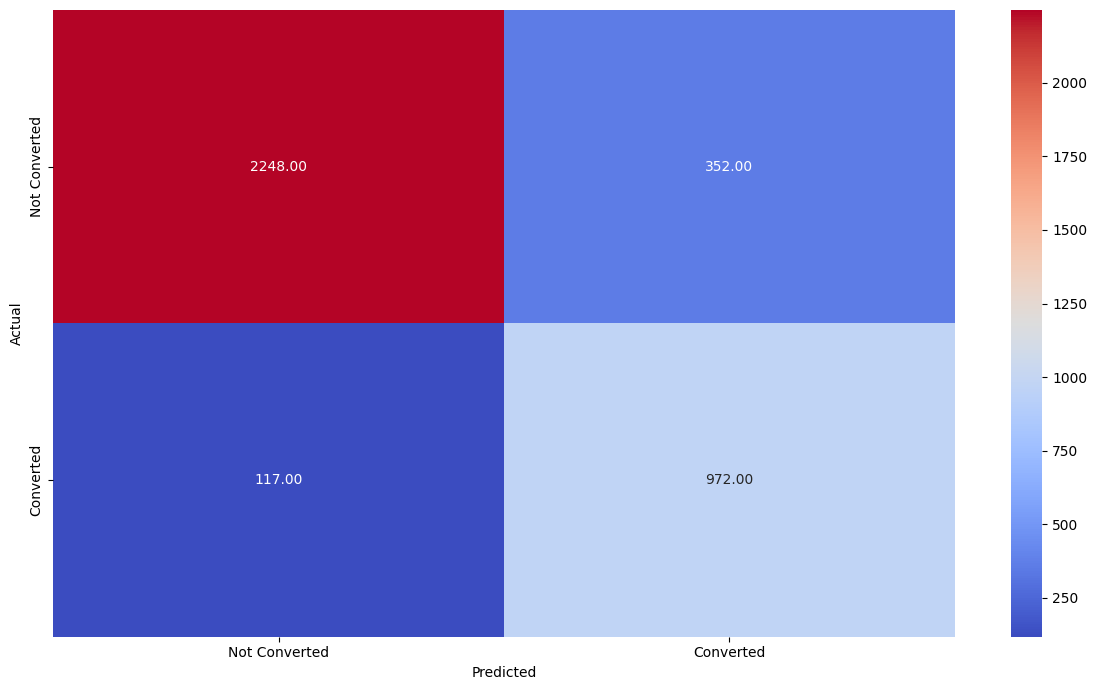

In [ ]:
classification_model(r_forest_estimator, X_train, y_train)
metrics_score(y_train, y_train_pred_r_forest_gs)

After tuning, the random forest no longer overfits, and instead of memorizing the data with perfect 1.00 scores, it now shows more realistic performance: recall 89%, f1 81% for converted leads. Tuning helped because parameters like max_depth and min_samples_leaf reduced the complexity of each tree, preventing the model from memorizing the training data.

Let'scheck the model on the test set

In [ ]:
# RF hyperparameter tuning on the test set
y_test_pred_r_forest_gs = r_forest_estimator.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       635
           1       0.73      0.84      0.78       288

    accuracy                           0.85       923
   macro avg       0.83      0.85      0.84       923
weighted avg       0.86      0.85      0.86       923



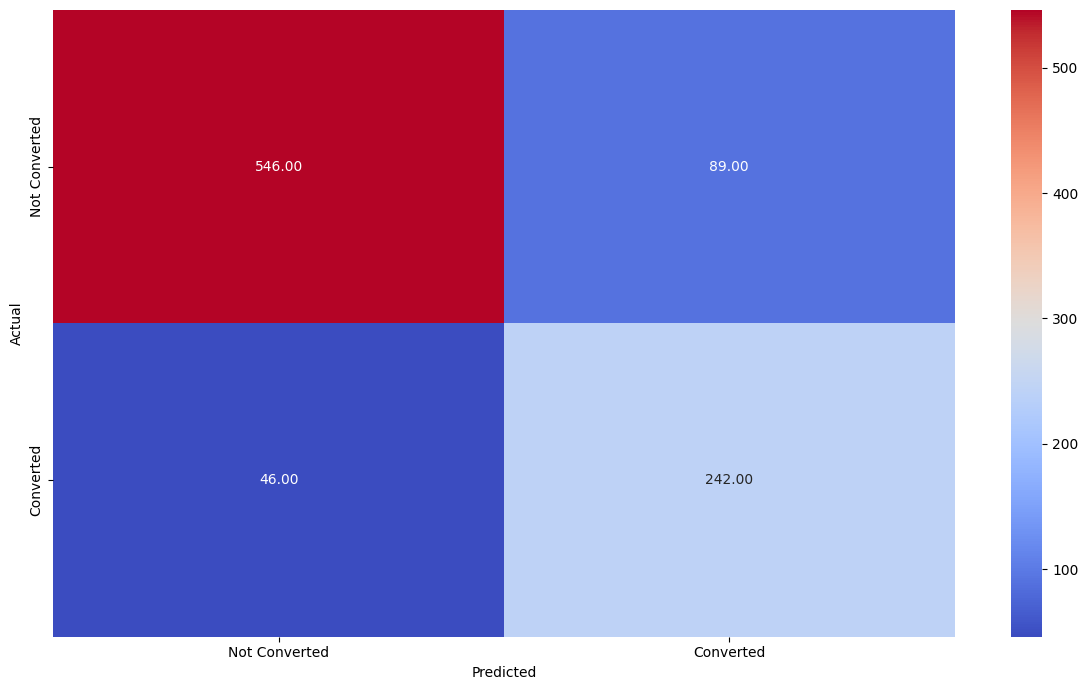

In [ ]:
classification_model(r_forest_estimator, X_test, y_test)
metrics_score(y_test, y_test_pred_r_forest_gs)

On the test set, the tuned Random Forest improved the recall for converted users to 84%, performing better than the untuned version while keeping the overall accuracy stable. This means the model generalizes well and is now better at catching actual converters without overfitting

Since visualizing an entire random forest would be complex and difficult to interpret, we will use the feature importance chart as the primary method for understanding the model's behavior.

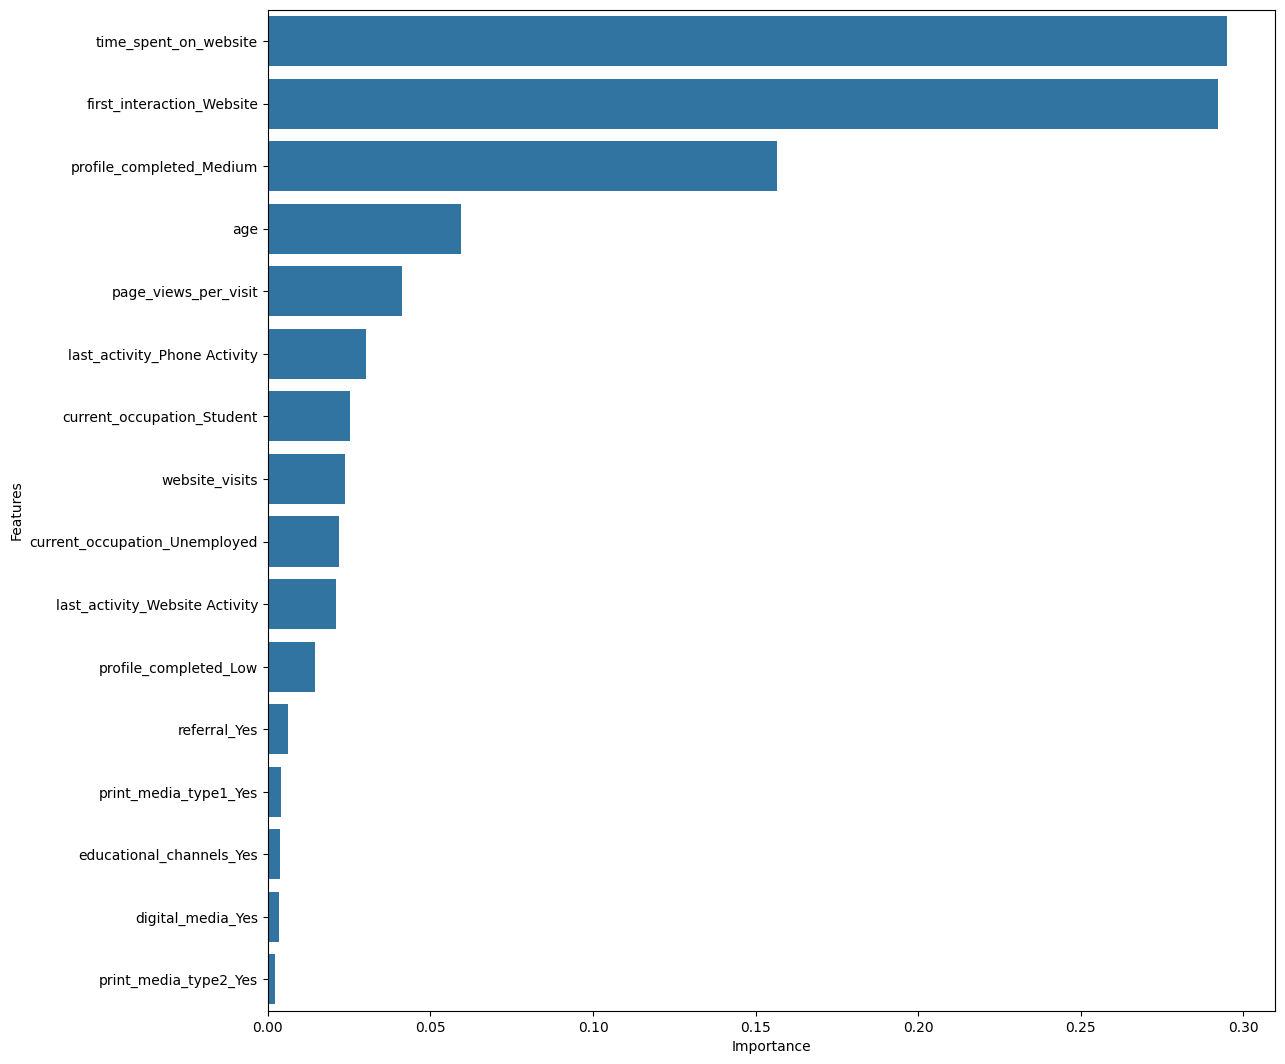

In [ ]:
# checking feature importances
importances = r_forest_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance'])\
                     .sort_values(by='Importance', ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(x=importance_df.Importance, y=importance_df.index)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

The random forest model confirms the same patterns found earlier with the decision tree. The two strongest predictors of lead conversion are "time_spent_on_website" and "first_interaction_Website", indicating that users who begin their journey on the website and spend more time engaging with it are more likely to convert. The next most influential factor is "profile_completed_Medium", suggesting that users who show more effort in completing their profile have a higher likelihood of conversion.

**Conclusions**

From the analysis, we identified the two strongest predictors of conversion: first interaction through the website and time spent on the website. This suggests that leads who spend more time exploring the website are more likely to convert.

Among all models tested so far, the tuned Random Forest performed the best, achieving 85% accuracy and 84% recall for converted leads on the test set.
Adding hyperparameters such as "max_depth" and trying different splitting criteria (gini, entropy) helped us reduce overfitting and improved the model's ability to capture real conversion patterns.

In this analysis, recall for the converted class was the most important metric. Future models should continue focusing on improving recall, as accuracy alone is high across all models but does not provide meaningful insight into how well the model identifies the leads who are most likely to convert.

**Business Recommendations**

Since first interaction on the website and time spent on the website are the most important features, we can conclude that improving the website's user experience could increase conversion rates. A clearer interface, easier navigation, and more engaging content can help users explore the topics and pages they are interested in, which may lead to higher conversions.

Mobile usage also appears to be an important factor, as a relatively high number of users prefer accessing the platform through a mobile app. Making the mobile version more user-friendly could increase engagement and allow users to convert directly through mobile, without needing to visit the website.

The target audience consists mainly of working professionals and unemployed individuals, who find the resource helpful for skill improvement and career development. Therefore, the platform should focus on creating content tailored to people who want to start a new career, improve their skills, or transition into better job opportunities. Students show the lowest engagement, so the content strategy should not prioritize college-level topics but instead concentrate on professional growth.

Sources of information such as newsletters, magazines, and educational channels do not bring significant value in attracting new leads. It is recommended to stop allocating budget to these channels and redirect it toward more effective areas, such as website and mobile improvement. Even digital media performs worse than referrals, suggesting that marketing through these channels should be redesigned or, in the case of outdated sources like magazines and newsletters, removed entirely.

Users who complete their profiles at least to a medium level (up to 75%) also tend to convert more than those who do not. Encouraging users to complete their profiles early, like adding progress bars, reminders, or small incentives can increase profile completion rates and improve the chance of conversion.

**XGBOOST Ensemble Technique**

Now that we finished the main analysis and conclusions, we can also try XGBoost out of interest to see if it can outperform our tuned Random Forest.

In [ ]:
# XGBoost Classifier technique
xgb = XGBClassifier(random_state=1,
                    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum())

parameters ={"max_depth": 4,
             "n_estimators": 300,
             "learning_rate": 0.05,
             "eval_metric":"logloss"}
xgb.set_params(**parameters)

xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_train_pred_xgb = xgb.predict(X_train)

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2600
           1       0.74      0.92      0.82      1089

    accuracy                           0.88      3689
   macro avg       0.85      0.89      0.87      3689
weighted avg       0.90      0.88      0.89      3689



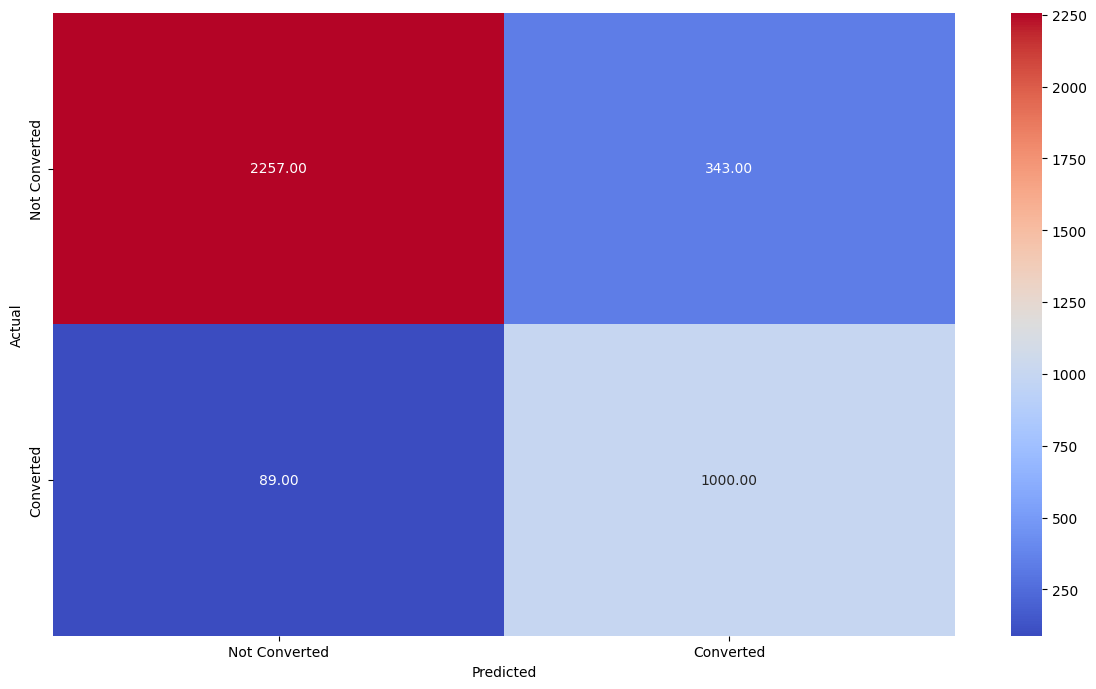

In [ ]:
classification_model(xgb, X_train, y_train)
metrics_score(y_train, y_train_pred_xgb)

We used the "scale_pos_weight" parameter to balance the data, giving more importance to the converted users class, which is the minority in our dataset. As a result, XGBoost improved the recall for converted users to 92%, the highest among all models tested so far. This indicates that the model successfully identifies nearly all leads who are likely to convert, showing strong performance on the training data.
Next, we will evaluate the model on the test set to see how well it generalizes to unseen data.

In [ ]:
y_test_pred_xgb = xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       635
           1       0.73      0.86      0.79       288

    accuracy                           0.86       923
   macro avg       0.83      0.86      0.84       923
weighted avg       0.87      0.86      0.86       923



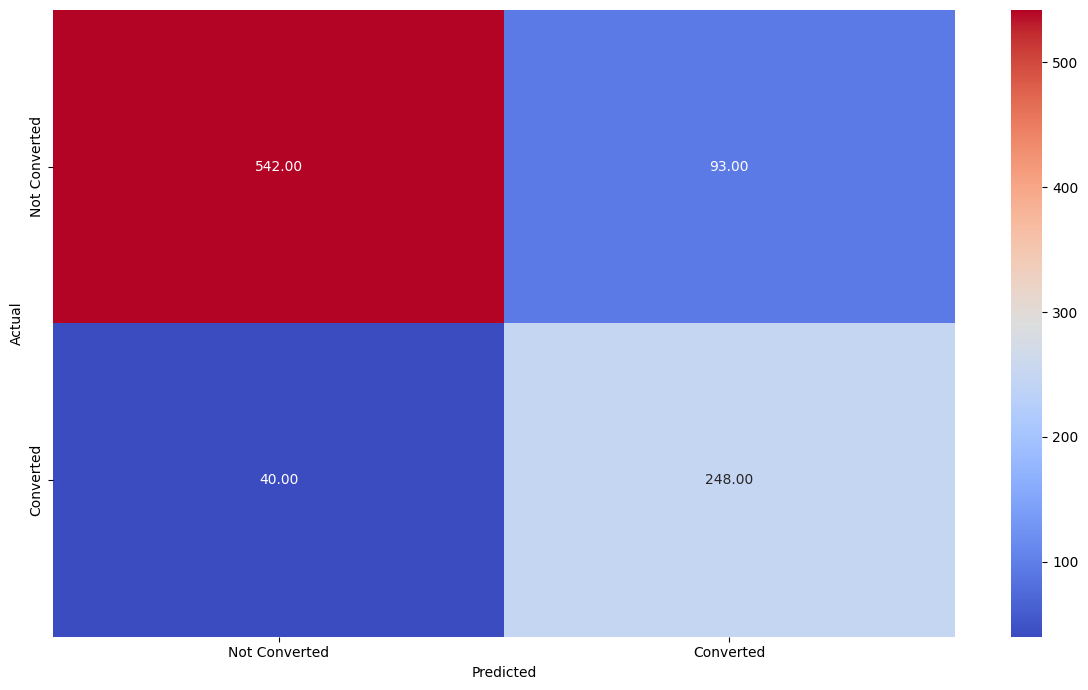

In [ ]:
classification_model(xgb, X_test, y_test)
metrics_score(y_test, y_test_pred_xgb)

XGBoost slightly increased the recall for converted users to 86%, compared to 84% from the tuned Random Forest. This means XGBoost was able to correctly identify a few more true converters. However, the overall accuracy and F1-score remain nearly identical to the Random Forest, indicating that XGBoost does not provide a significant performance advantage on this dataset.